In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import time
import sklearn
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
from random import random
from tabulate import tabulate
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import ExtraTreeClassifier
from contextlib import redirect_stdout
evaluate={'Acc':"Accuracy", 'b_Acc':"Balanced Accuracy", 'F1':"F1 Score", 'kap':"Kappa", 'ROC':"Roc"}

In [3]:
saat=time.time()

In [4]:
def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [5]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
            
    return files_add

files_add=find_the_way("./",".csv")
files_add

['./ortalama.csv',
 './results\\compare\\CV\\DT_ADS1_ACK Flag Cnt.csv',
 './results\\compare\\CV\\DT_ADS1_Active Max.csv',
 './results\\compare\\CV\\DT_ADS1_Active Mean.csv',
 './results\\compare\\CV\\DT_ADS1_Active Min.csv',
 './results\\compare\\CV\\DT_ADS1_Active Std.csv',
 './results\\compare\\CV\\DT_ADS1_Bwd Blk Rate Avg.csv',
 './results\\compare\\CV\\DT_ADS1_Bwd Byts-b Avg.csv',
 './results\\compare\\CV\\DT_ADS1_Bwd Header Len.csv',
 './results\\compare\\CV\\DT_ADS1_Bwd IAT Max.csv',
 './results\\compare\\CV\\DT_ADS1_Bwd IAT Mean.csv',
 './results\\compare\\CV\\DT_ADS1_Bwd IAT Min.csv',
 './results\\compare\\CV\\DT_ADS1_Bwd IAT Std.csv',
 './results\\compare\\CV\\DT_ADS1_Bwd IAT Tot.csv',
 './results\\compare\\CV\\DT_ADS1_Bwd Pkt Len Max.csv',
 './results\\compare\\CV\\DT_ADS1_Bwd Pkt Len Mean.csv',
 './results\\compare\\CV\\DT_ADS1_Bwd Pkt Len Min.csv',
 './results\\compare\\CV\\DT_ADS1_Bwd Pkt Len Std.csv',
 './results\\compare\\CV\\DT_ADS1_Bwd Pkts-b Avg.csv',
 './results\\co

In [6]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier    
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import  ComplementNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB  
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier


from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

from sklearn import datasets
import sklearn
import time


from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from scipy.stats import randint as sp_randint
from scipy.stats import randint as sp_randFloat

In [7]:
ml_list={"DT": DecisionTreeClassifier(),
         "LR": LogisticRegression(),
         "BNB": BernoulliNB(),
       
       
         "kNN": KNeighborsClassifier(),
         "GNB": GaussianNB(),
           "MLP": MLPClassifier(),"SVM": SVC()}

ml_list={"ET":ExtraTreeClassifier(),
"DT":DecisionTreeClassifier(),
#"OneClassSVM":OneClassSVM(),
#"MLPClassifier":MLPClassifier(),
#"ComplementNB":ComplementNB(),
###################"DummyClassifier":DummyClassifier(),         
#"RadiusNeighborsClassifier":RadiusNeighborsClassifier(),
#"KNeighborsClassifier":KNeighborsClassifier(),
#"ClassifierChain":ClassifierChain(base_estimator=DecisionTreeClassifier()),
#"MultiOutputClassifier":MultiOutputClassifier(estimator=DecisionTreeClassifier()),
#####################"OutputCodeClassifier":OutputCodeClassifier(estimator=DecisionTreeClassifier()),
#"OneVsOneClassifier":OneVsOneClassifier(estimator=DecisionTreeClassifier()),
#########################"OneVsRestClassifier":OneVsRestClassifier(estimator=DecisionTreeClassifier()),
#"SGDClassifier":SGDClassifier(),
#######################################"RidgeClassifierCV":RidgeClassifierCV(),
"Ridge":RidgeClassifier(),
############################"PassiveAggressiveClassifier    ":PassiveAggressiveClassifier    (),
#"GaussianProcessClassifier":GaussianProcessClassifier(),
#"AdaBoostClassifier":AdaBoostClassifier(),
#"GradientBoostingClassifier":GradientBoostingClassifier(),
"Bagg":BaggingClassifier(),
"ETs":ExtraTreesClassifier(),
"RF":RandomForestClassifier(),
"BNB":BernoulliNB(),
##############"CalibratedClassifierCV":CalibratedClassifierCV(),
"GNB":GaussianNB(),
#"LabelPropagation":LabelPropagation(),
#"LabelSpreading":LabelSpreading(),
"LDA":LinearDiscriminantAnalysis(),
#"LinearSVC":LinearSVC(),
"LR":LogisticRegression(),
#"LogisticRegressionCV":LogisticRegressionCV(),
#"MultinomialNB  ":MultinomialNB  (),
#########################################"NearestCentroid":NearestCentroid(),
#"NuSVC":NuSVC(),
##############################################"Perceptron":Perceptron(),
"QDA":QuadraticDiscriminantAnalysis()}
#"SVC":SVC(),    #  "XGB": xgboost.XGBClassifier(),
         #"cat":CatBoostClassifier(),
#"HistGradientBoostingClassifier":HistGradientBoostingClassifier()}
#"CategoricalNB" : CategoricalNB()}

ml_list={"DT": DecisionTreeClassifier(),
       "Bagg":BaggingClassifier()}
ml_list={"DT": DecisionTreeClassifier()}

In [8]:
def target_name(name):
    df = pd.read_csv(name,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    return target_names

In [9]:
folder("results/compare/SS/")
folder("results/compare/CV/")
folder("results/compare/DD/")
folder("pdfs")

## Calculation of evaluations

In [10]:
def score(train_time,test_time,predict,y_test,class_based_results,repeat,cv,dname,ml,sw):
    train_time=train_time[0]
    test_time=test_time[0]
    rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
    pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
    f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")     
    accuracy=sklearn.metrics.accuracy_score(y_test, predict)
    accuracy_b=sklearn.metrics.balanced_accuracy_score( y_test,predict)
    kappa=sklearn.metrics.cohen_kappa_score(y_test, predict,labels=None, weights=None, sample_weight=None)
    try:
        roc=sklearn.metrics.roc_auc_score(y_test, predict)
    except:roc=0
    report = sklearn.metrics.classification_report(y_test, predict, target_names=target_names,output_dict=True)
    cr = pd.DataFrame(report).transpose()
    line=[dname,sw,repeat,cv,ml,accuracy,accuracy_b,pr,rc,f_1,kappa,roc,train_time,test_time]

    if class_based_results.empty:
        class_based_results =cr
    else:
        class_based_results = class_based_results.add(cr, fill_value=0)
    return class_based_results,line

In [11]:
def ML(loop1,loop2,output_csv,cols,dname,sw):
    fold=5
    repetition=5
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Feature","Dataset","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        for i in range(repetition):
                try:

                    df = pd.read_csv(loop1,usecols=cols)#,header=None )
                    df=df.fillna(0)
                    X_train =df[df.columns[0:-1]]
                    X_train=np.array(X_train)
                    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
                    y_train=df[df.columns[-1]].cat.codes  
    
    
                    df = pd.read_csv(loop2,usecols=cols)#,header=None )
                    df=df.fillna(0)
                    X_test =df[df.columns[0:-1]]
                    X_test=np.array(X_test)
                    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
                    y_test=df[df.columns[-1]].cat.codes  
    
    
                    #dname=loop1  [6:-13]  
                    results_y=[]
           
                    results_y.append(y_test)
    
    
                    precision=[]
                    recall=[]
                    f1=[]
                    accuracy=[]
                    train_time=[]
                    test_time=[]
                    total_time=[]
                    kappa=[]
                    accuracy_b=[]
    
                        #machine learning algorithm is applied in this section
                    clf = ml_list[ii]#choose algorithm from ml_list dictionary
                    second=time.time()
                    clf.fit(X_train, y_train)
                    train_time.append(float((time.time()-second)) )
                    second=time.time()
                    predict =clf.predict(X_test)
                    test_time.append(float((time.time()-second)) )
        
                    altime=0
                    class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
                    lines.append(line)
                except:pass
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        #print(results)
        del results["Feature"]
        del results["Dataset"]
        del results["ML"]
        del results["T"]
        del results["CV"]
        del results["ROC"]
        #print(results)
        results=results.mean()
        results=results.round(3)
        list1 = [train,cols[0][:15],ii]
        list1.extend(list(results.values))
  
        
        print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero, list1[0],
            list1[1],   
            list1[2][:5],
            list1[3],
            list1[4],
            list1[5],   
            list1[6],
            list1[7],
            list1[8],
            list1[9],   
            list1[10]))

        #print (tabulate(results, headers=list(results.columns)))
        #print()






In [12]:
def ML_CV(loop1,loop2,output_csv,cols,dname,sw):
    fold=5
    repetition=1
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Feature","Dataset","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        for i in range(repetition):
            rnd = random()
            kfold = sklearn.model_selection.KFold(n_splits=fold, shuffle=True, random_state=int(rnd*100))  
            cv=0
            df = pd.read_csv(loop1,usecols=cols)#,header=None )
            ##df = df.reset_index(drop=True)
            df=df.fillna(0)

            #del df["MAC"] # if dataset has MAC colomn please uncomment this line
            X =df[df.columns[0:-1]]
            X=np.array(X)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y=df[df.columns[-1]].cat.codes  
            X.shape
            for train_index, test_index in kfold.split(X):
                try:
                    X_train, X_test = X[train_index], X[test_index]
                    y_train, y_test = y[train_index], y[test_index]  
    
                    #dname=loop1  [6:-13]  
                    results_y=[]
                    cv+=1
                    results_y.append(y_test)
    
    
                    precision=[]
                    recall=[]
                    f1=[]
                    accuracy=[]
                    train_time=[]
                    test_time=[]
                    total_time=[]
                    kappa=[]
                    accuracy_b=[]
    
                        #machine learning algorithm is applied in this section
                    clf = ml_list[ii]#choose algorithm from ml_list dictionary
                    second=time.time()
                    clf.fit(X_train, y_train)
                    train_time.append(float((time.time()-second)) )
                    second=time.time()
                    predict =clf.predict(X_test)
                    test_time.append(float((time.time()-second)) )
        
                    altime=0
                    class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
                    lines.append(line)
                except:pass
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        #print(results)
        del results["Feature"]
        del results["Dataset"]
        del results["ML"]
        del results["T"]
        del results["CV"]
        del results["ROC"]
        #print(results)
        results=results.mean()
        results=results.round(3)
        list1 = [file_list[loop1],cols[0][:15],ii]
        list1.extend(list(results.values))
  
        
        print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero, list1[0],
            list1[1],   
            list1[2][:5],
            list1[3],
            list1[4],
            list1[5],   
            list1[6],
            list1[7],
            list1[8],
            list1[9],   
            list1[10]))

        #print (tabulate(results, headers=list(results.columns)))
        #print()






In [13]:
features=[#'Flow ID',
 #'Src IP',
 'Src Port',
 #'Dst IP',
 'Dst Port',
 'Protocol',
 #'Timestamp',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Blk Rate Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Fwd Seg Size Min',
 'Active Mean',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Std',
 'Idle Max',
 'Idle Min']

print(len(features))

79


In [14]:
file_list={ './small/AD-S1.csv':"ADS1",
 './small/AD-S2.csv':"ADS2",
 './small/DI-S1.csv':"DIS1",
 './small/DI-S2.csv':"DIS2"}

# CV

In [16]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(train,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/CV/ML_{file_list[train]}_{dname.replace("/","-")}.csv"
            #print(f"{list[train]} Dataset - Feature {number+1}/{len(features)}")
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            ML_CV(train,"",output_csv,feature,dname,file_list[train])
            
        except:
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorCV.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {list[train]} Dataset - Feature {dname}")
                    df = pd.read_csv(train,usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")

No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   ADS1       Src Port        DT         0.81       0.77       0.811      0.77       0.775      0.79       0.163      0.005     
001   ADS1       Dst Port        DT         0.562      0.401      0.603      0.401      0.431      0.508      0.119      0.004     
002   ADS1       Protocol        DT         0.226      0.086      0.032      0.086      0.042      0.112      0.009      0.007     
003   ADS1       Flow Duration   DT         0.511      0.489      0.488      0.489      0.487      0.461      0.386      0.011     
004   ADS1       Tot Fwd Pkts    DT         0.34       0.25       0.331      0.25       0.21       0.265      0.017      0.011     
005   ADS1       Tot Bwd Pkts    DT         0.312      0.227      0.334      0.227      0.201      0.225      0.017      0.004     
006   ADS1       TotLen Fwd Pkts DT         0.591      0.548      0.871     

282   ADS2       stun.type.metho DT         0.064      0.05       0.037      0.05       0.011      0.003      0.001      0.0       
283   ADS2       tcp.checksum    DT         0.087      0.074      0.055      0.074      0.047      0.034      0.033      0.0       
284   ADS2       tcp.flags       DT         0.154      0.128      0.137      0.128      0.064      0.102      0.0        0.003     
285   ADS2       tls.handshake.s DT         0.059      0.048      0.05       0.048      0.006      0.001      0.002      0.0       
286   ADS2       tls.handshake.s DT         0.061      0.048      0.031      0.048      0.006      0.001      0.003      0.0       
287   ADS2       tls.handshake.v DT         0.064      0.049      0.048      0.049      0.009      0.003      0.0        0.0       
288   ADS2       udp.checksum    DT         0.281      0.248      0.547      0.248      0.262      0.237      0.006      0.0       
289   ADS2       http.connection DT         0.061      0.051      0.029     

345   ADS2       dstport_class   DT         0.203      0.184      0.206      0.184      0.15       0.155      0.001      0.003     
346   ADS2       srcport_class   DT         0.213      0.191      0.247      0.191      0.16       0.164      0.004      0.0       
000   DIS1       dns.time        DT         0.054      0.048      0.022      0.048      0.005      0.0        0.002      0.0       
001   DIS1       http.time       DT         0.062      0.053      0.139      0.053      0.016      0.007      0.0        0.0       
002   DIS1       icmp.data_time_ DT         0.066      0.058      0.135      0.058      0.024      0.013      0.001      0.0       
003   DIS1       icmp.resptime   DT         0.056      0.049      0.04       0.049      0.008      0.002      0.0        0.0       
004   DIS1       stun.time       DT         0.057      0.048      0.003      0.048      0.005      0.0        0.0        0.0       
005   DIS1       tcp.ack         DT         0.341      0.338      0.505     

061   DIS1       dns.retransmit_ DT         0.059      0.048      0.028      0.048      0.006      0.0        0.003      0.0       
062   DIS1       dns.retransmit_ DT         0.055      0.048      0.003      0.048      0.005      0.0        0.001      0.002     
063   DIS1       dns.retransmit_ DT         0.057      0.048      0.003      0.048      0.005      0.0        0.004      0.0       
064   DIS1       dns.soa.expire_ DT         0.055      0.048      0.003      0.048      0.005      0.0        0.0        0.0       
065   DIS1       dns.soa.minimum DT         0.057      0.048      0.003      0.048      0.005      0.0        0.001      0.0       
066   DIS1       dns.soa.refresh DT         0.059      0.048      0.003      0.048      0.005      0.0        0.0        0.0       
067   DIS1       dns.soa.retry_i DT         0.059      0.048      0.003      0.048      0.005      0.0        0.001      0.004     
068   DIS1       dns.soa.serial_ DT         0.056      0.048      0.003     

124   DIS1       ip.opt.type     DT         0.104      0.09       0.134      0.09       0.054      0.052      0.0        0.0       
125   DIS1       ip.opt.type.cla DT         0.092      0.081      0.029      0.081      0.034      0.041      0.0        0.0       
126   DIS1       ip.opt.type.cop DT         0.09       0.08       0.029      0.08       0.034      0.04       0.001      0.0       
127   DIS1       ip.opt.type.num DT         0.094      0.081      0.029      0.081      0.035      0.041      0.001      0.0       
128   DIS1       ntp.flags.li    DT         0.06       0.053      0.076      0.053      0.015      0.006      0.002      0.0       
129   DIS1       ntp.flags.mode  DT         0.06       0.05       0.029      0.05       0.01       0.003      0.002      0.0       
130   DIS1       ntp.flags.vn    DT         0.061      0.053      0.071      0.053      0.015      0.006      0.002      0.002     
131   DIS1       ntp.ppoll       DT         0.065      0.053      0.093     

187   DIS1       tcp.options.sac DT         0.058      0.049      0.059      0.049      0.008      0.002      0.002      0.0       
188   err        tcp.options.sac err        err        err        err        err        err        err        err        err       
189   DIS1       tcp.options.sac DT         0.061      0.054      0.016      0.054      0.013      0.007      0.0        0.0       
190   err        tcp.options.sac err        err        err        err        err        err        err        err        err       
191   DIS1       tcp.options.wsc DT         0.077      0.064      0.247      0.064      0.035      0.02       0.003      0.0       
192   DIS1       tcp.options.wsc DT         0.076      0.064      0.258      0.064      0.035      0.02       0.0        0.002     
193   DIS1       tcp.pdu.size    DT         0.057      0.049      0.1        0.049      0.008      0.001      0.002      0.0       
194   DIS1       tcp.reassembled DT         0.063      0.058      0.263     

250   err        _ws.col.Destina err        err        err        err        err        err        err        err        err       
251   err        _ws.col.Source  err        err        err        err        err        err        err        err        err       
252   DIS1       stun.cookie     DT         0.06       0.048      0.032      0.048      0.007      0.001      0.002      0.0       
253   DIS1       stun.id         DT         0.058      0.048      0.084      0.048      0.007      0.001      0.002      0.006     
254   DIS1       stun.value      DT         0.057      0.048      0.003      0.048      0.005      0.0        0.002      0.002     
255   DIS1       tcp.options     DT         0.119      0.102      0.167      0.102      0.032      0.067      0.0        0.0       
256   DIS1       tcp.options.mss DT         0.066      0.055      0.111      0.055      0.016      0.009      0.003      0.0       
257   err        tcp.options.sac err        err        err        err       

313   DIS1       eth.ig          DT         0.094      0.081      0.015      0.081      0.023      0.041      0.002      0.0       
314   DIS1       eth.lg          DT         0.084      0.072      0.017      0.072      0.023      0.03       0.0        0.0       
315   DIS1       ip.checksum.sta DT         0.091      0.079      0.012      0.079      0.02       0.039      0.002      0.0       
316   DIS1       ip.dsfield.dscp DT         0.1        0.088      0.127      0.088      0.036      0.049      0.003      0.0       
317   DIS1       ip.dsfield.ecn  DT         0.09       0.08       0.012      0.08       0.02       0.039      0.0        0.0       
318   DIS1       ip.flags.df     DT         0.142      0.121      0.026      0.121      0.041      0.091      0.002      0.0       
319   DIS1       ip.flags.mf     DT         0.093      0.079      0.012      0.079      0.02       0.039      0.0        0.0       
320   DIS1       ip.flags.rb     DT         0.091      0.079      0.012     

029   DIS2       dhcp.hw.addr_pa DT         0.077      0.063      0.047      0.063      0.028      0.019      0.0        0.0       
030   DIS2       dhcp.hw.len     DT         0.073      0.063      0.047      0.063      0.028      0.018      0.0        0.002     
031   DIS2       dhcp.option.dhc DT         0.076      0.063      0.096      0.063      0.029      0.019      0.0        0.002     
032   DIS2       dhcp.option.dhc DT         0.073      0.062      0.068      0.062      0.027      0.018      0.0        0.0       
033   DIS2       dhcp.option.end DT         0.077      0.063      0.047      0.063      0.028      0.019      0.002      0.0       
034   DIS2       dhcp.option.int DT         0.059      0.048      0.003      0.048      0.005      0.0        0.001      0.0       
035   DIS2       dhcp.option.ip_ DT         0.057      0.048      0.036      0.048      0.006      0.001      0.002      0.0       
036   DIS2       dhcp.option.pad DT         0.075      0.063      0.048     

092   DIS2       http.prev_respo DT         0.059      0.054      0.064      0.054      0.015      0.007      0.002      0.0       
093   DIS2       http.request    DT         0.061      0.053      0.025      0.053      0.014      0.007      0.002      0.002     
094   DIS2       http.request_in DT         0.061      0.05       0.046      0.05       0.01       0.003      0.0        0.0       
095   DIS2       http.request_nu DT         0.064      0.055      0.07       0.055      0.018      0.009      0.0        0.0       
096   DIS2       http.response   DT         0.068      0.056      0.03       0.056      0.019      0.011      0.002      0.0       
097   DIS2       http.response.c DT         0.068      0.056      0.03       0.056      0.019      0.011      0.002      0.0       
098   DIS2       http.response_n DT         0.065      0.057      0.075      0.057      0.021      0.011      0.002      0.0       
099   DIS2       icmp.checksum.s DT         0.065      0.056      0.02      

155   DIS2       tcp.analysis.pu DT         0.294      0.279      0.692      0.279      0.317      0.253      0.005      0.0       
156   DIS2       tcp.analysis.re DT         0.061      0.05       0.015      0.05       0.01       0.004      0.0        0.0       
157   DIS2       tcp.analysis.re DT         0.057      0.049      0.028      0.049      0.008      0.002      0.0        0.0       
158   DIS2       tcp.analysis.rt DT         0.061      0.052      0.108      0.052      0.014      0.004      0.002      0.0       
159   DIS2       tcp.analysis.sp DT         0.062      0.05       0.026      0.05       0.009      0.003      0.004      0.0       
160   DIS2       tcp.analysis.wi DT         0.059      0.049      0.05       0.049      0.009      0.002      0.0        0.0       
161   DIS2       tcp.checksum.st DT         0.098      0.085      0.01       0.085      0.017      0.046      0.004      0.0       
162   DIS2       tcp.completenes DT         0.186      0.16       0.156     

218   DIS2       tls.handshake.e DT         0.059      0.048      0.007      0.048      0.006      0.0        0.0        0.0       
219   DIS2       tls.handshake.e DT         0.058      0.048      0.017      0.048      0.007      0.001      0.002      0.0       
220   DIS2       tls.handshake.e DT         0.061      0.049      0.05       0.049      0.008      0.002      0.003      0.0       
221   DIS2       tls.handshake.e DT         0.06       0.052      0.274      0.052      0.013      0.003      0.0        0.0       
222   DIS2       tls.handshake.e DT         0.058      0.048      0.013      0.048      0.006      0.0        0.0        0.0       
223   DIS2       tls.handshake.e DT         0.059      0.05       0.152      0.05       0.01       0.002      0.002      0.0       
224   DIS2       tls.handshake.e DT         0.061      0.05       0.154      0.05       0.01       0.002      0.004      0.0       
225   DIS2       tls.handshake.e DT         0.058      0.049      0.021     

281   DIS2       stun.type.metho DT         0.058      0.048      0.041      0.048      0.006      0.0        0.0        0.0       
282   DIS2       stun.type.metho DT         0.055      0.048      0.043      0.048      0.006      0.0        0.0        0.002     
283   DIS2       tcp.checksum    DT         0.089      0.078      0.062      0.078      0.055      0.037      0.049      0.001     
284   DIS2       tcp.flags       DT         0.152      0.133      0.066      0.133      0.059      0.103      0.005      0.0       
285   DIS2       tls.handshake.s DT         0.057      0.048      0.031      0.048      0.006      0.0        0.001      0.001     
286   DIS2       tls.handshake.s DT         0.056      0.048      0.031      0.048      0.005      0.0        0.001      0.0       
287   DIS2       tls.handshake.v DT         0.058      0.048      0.021      0.048      0.007      0.001      0.001      0.0       
288   DIS2       udp.checksum    DT         0.168      0.149      0.419     

344   DIS2       srcport         DT         0.199      0.184      0.626      0.184      0.209      0.152      0.006      0.0       
345   DIS2       dstport_class   DT         0.142      0.13       0.225      0.13       0.111      0.088      0.004      0.0       
346   DIS2       srcport_class   DT         0.127      0.121      0.24       0.121      0.1        0.076      0.003      0.0       


In [17]:
time.time()-saat

492.0752000808716

# Session vs Session

In [15]:
file_list={"AD-S1-2":['./small/AD-S1.csv', './small/AD-S2.csv'],
"AD-S2-1":['./small/AD-S2.csv','./small/AD-S1.csv'],
"DI-S1-2":['./small/DI-S1.csv', './small/DI-S2.csv'],
"DI-S2-1":['./small/DI-S2.csv','./small/DI-S1.csv']}

In [16]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(file_list[train][0],usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/SS/ML_{train}_{dname.replace("/","-")}.csv"
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            temp=ML(file_list[train][0],file_list[train][1],output_csv,feature,dname,train)  
        except:
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorSS.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {train} Dataset - Feature {dname}")
                    print("TRAIN")
                    df = pd.read_csv(file_list[train][0],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("TEST")
                    df = pd.read_csv(file_list[train][1],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")


No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   AD-S1-2    Src Port        DT         0.628      0.432      0.562      0.432      0.446      0.585      1.675      0.184     
001   AD-S1-2    Dst Port        DT         0.449      0.387      0.519      0.387      0.362      0.385      0.943      0.14      
002   AD-S1-2    Protocol        DT         0.108      0.062      0.02       0.062      0.025      0.022      0.046      0.086     
003   AD-S1-2    Flow Duration   DT         0.493      0.467      0.468      0.467      0.461      0.442      3.739      0.311     
004   AD-S1-2    Tot Fwd Pkts    DT         0.389      0.25       0.274      0.25       0.219      0.313      0.277      0.175     
005   AD-S1-2    Tot Bwd Pkts    DT         0.36       0.195      0.276      0.195      0.192      0.259      0.162      0.268     
006   AD-S1-2    TotLen Fwd Pkts DT         0.592      0.564      0.785     

314   AD-S1-2    eth.lg          DT         0.084      0.078      0.011      0.078      0.019      0.03       0.004      0.001     
315   AD-S1-2    ip.checksum.sta DT         0.081      0.066      0.01       0.066      0.016      0.024      0.002      0.005     
316   AD-S1-2    ip.dsfield.dscp DT         0.102      0.085      0.096      0.085      0.044      0.046      0.0        0.0       
317   AD-S1-2    ip.dsfield.ecn  DT         0.084      0.072      0.057      0.072      0.027      0.026      0.0        0.002     
318   AD-S1-2    ip.flags.df     DT         0.131      0.105      0.022      0.105      0.036      0.076      0.006      0.0       
319   AD-S1-2    ip.flags.mf     DT         0.081      0.066      0.01       0.066      0.016      0.024      0.0        0.002     
320   AD-S1-2    ip.flags.rb     DT         0.081      0.066      0.01       0.066      0.016      0.024      0.005      0.001     
321   AD-S1-2    ip.frag_offset  DT         0.081      0.066      0.01      

030   AD-S2-1    dhcp.hw.len     DT         0.064      0.058      0.048      0.058      0.021      0.009      0.002      0.002     
031   AD-S2-1    dhcp.option.dhc DT         0.064      0.058      0.048      0.058      0.021      0.009      0.003      0.002     
032   AD-S2-1    dhcp.option.dhc DT         0.064      0.057      0.097      0.057      0.02       0.008      0.002      0.002     
033   AD-S2-1    dhcp.option.end DT         0.064      0.058      0.048      0.058      0.021      0.009      0.004      0.0       
034   AD-S2-1    dhcp.option.int DT         0.056      0.048      0.003      0.048      0.005      0.0        0.0        0.0       
035   AD-S2-1    dhcp.option.ip_ DT         0.056      0.048      0.05       0.048      0.006      0.0        0.002      0.001     
036   AD-S2-1    dhcp.option.pad DT         0.064      0.058      0.048      0.058      0.021      0.009      0.001      0.007     
037   AD-S2-1    dhcp.option.reb DT         0.056      0.048      0.003     

093   AD-S2-1    http.request    DT         0.06       0.051      0.03       0.051      0.011      0.004      0.001      0.002     
094   AD-S2-1    http.request_in DT         0.059      0.049      0.041      0.049      0.008      0.001      0.002      0.005     
095   AD-S2-1    http.request_nu DT         0.061      0.051      0.062      0.051      0.012      0.005      0.0        0.003     
096   AD-S2-1    http.response   DT         0.069      0.057      0.029      0.057      0.02       0.012      0.001      0.001     
097   AD-S2-1    http.response.c DT         0.069      0.057      0.029      0.057      0.02       0.012      0.001      0.002     
098   AD-S2-1    http.response_n DT         0.07       0.058      0.107      0.058      0.024      0.013      0.002      0.0       
099   AD-S2-1    icmp.checksum.s DT         0.062      0.051      0.026      0.051      0.011      0.005      0.0        0.0       
100   AD-S2-1    icmp.code       DT         0.062      0.051      0.026     

156   AD-S2-1    tcp.analysis.re DT         0.062      0.053      0.03       0.053      0.014      0.007      0.002      0.002     
157   AD-S2-1    tcp.analysis.re DT         0.057      0.048      0.05       0.048      0.006      0.001      0.002      0.0       
158   AD-S2-1    tcp.analysis.rt DT         0.06       0.052      0.049      0.052      0.013      0.005      0.002      0.004     
159   AD-S2-1    tcp.analysis.sp DT         0.056      0.048      0.007      0.048      0.005      0.0        0.002      0.001     
160   AD-S2-1    tcp.analysis.wi DT         0.057      0.05       0.033      0.05       0.01       0.001      0.0        0.002     
161   AD-S2-1    tcp.checksum.st DT         0.062      0.05       0.005      0.05       0.009      0.004      0.0        0.0       
162   AD-S2-1    tcp.completenes DT         0.138      0.114      0.113      0.114      0.06       0.085      0.001      0.0       
163   AD-S2-1    tcp.connection. DT         0.066      0.052      0.015     

219   AD-S2-1    tls.handshake.e DT         0.057      0.049      0.014      0.049      0.007      0.001      0.001      0.004     
220   AD-S2-1    tls.handshake.e DT         0.058      0.051      0.036      0.051      0.011      0.002      0.004      0.003     
221   AD-S2-1    tls.handshake.e DT         0.061      0.053      0.344      0.053      0.016      0.005      0.004      0.002     
222   AD-S2-1    tls.handshake.e DT         0.057      0.048      0.034      0.048      0.006      0.001      0.002      0.002     
223   AD-S2-1    tls.handshake.e DT         0.058      0.051      0.227      0.051      0.012      0.003      0.001      0.003     
224   AD-S2-1    tls.handshake.e DT         0.058      0.051      0.227      0.051      0.012      0.003      0.005      0.001     
225   AD-S2-1    tls.handshake.e DT         0.056      0.048      0.008      0.048      0.006      0.0        0.004      0.002     
226   AD-S2-1    tls.handshake.e DT         0.057      0.049      0.015     

282   AD-S2-1    stun.type.metho DT         0.058      0.049      0.036      0.049      0.009      0.002      0.001      0.002     
283   AD-S2-1    tcp.checksum    DT         0.042      0.037      0.045      0.037      0.038      -0.013     0.052      0.006     
284   AD-S2-1    tcp.flags       DT         0.121      0.1        0.128      0.1        0.052      0.068      0.004      0.002     
285   AD-S2-1    tls.handshake.s DT         0.056      0.048      0.05       0.048      0.006      0.0        0.003      0.0       
286   AD-S2-1    tls.handshake.s DT         0.056      0.048      0.05       0.048      0.006      0.0        0.003      0.003     
287   AD-S2-1    tls.handshake.v DT         0.058      0.049      0.036      0.049      0.008      0.002      0.004      0.007     
288   AD-S2-1    udp.checksum    DT         0.175      0.145      0.322      0.145      0.132      0.124      0.009      0.002     
289   AD-S2-1    http.connection DT         0.063      0.049      0.018     

345   AD-S2-1    dstport_class   DT         0.16       0.144      0.187      0.144      0.12       0.107      0.002      0.004     
346   AD-S2-1    srcport_class   DT         0.17       0.154      0.235      0.154      0.133      0.118      0.006      0.0       
000   DI-S1-2    dns.time        DT         0.057      0.048      0.003      0.048      0.005      0.0        0.001      0.001     
001   DI-S1-2    http.time       DT         0.064      0.054      0.113      0.054      0.017      0.007      0.0        0.002     
002   DI-S1-2    icmp.data_time_ DT         0.066      0.055      0.125      0.055      0.02       0.009      0.004      0.0       
003   DI-S1-2    icmp.resptime   DT         0.055      0.05       0.05       0.05       0.009      0.002      0.004      0.002     
004   DI-S1-2    stun.time       DT         0.057      0.048      0.003      0.048      0.005      0.0        0.0        0.003     
005   DI-S1-2    tcp.ack         DT         0.327      0.315      0.469     

061   DI-S1-2    dns.retransmit_ DT         0.057      0.048      0.071      0.048      0.006      0.0        0.002      0.0       
062   DI-S1-2    dns.retransmit_ DT         0.057      0.048      0.027      0.048      0.005      0.0        0.001      0.001     
063   DI-S1-2    dns.retransmit_ DT         0.057      0.048      0.003      0.048      0.005      0.0        0.004      0.0       
064   DI-S1-2    dns.soa.expire_ DT         0.057      0.048      0.003      0.048      0.005      0.0        0.0        0.0       
065   DI-S1-2    dns.soa.minimum DT         0.057      0.048      0.003      0.048      0.005      0.0        0.002      0.002     
066   DI-S1-2    dns.soa.refresh DT         0.057      0.048      0.003      0.048      0.005      0.0        0.003      0.001     
067   DI-S1-2    dns.soa.retry_i DT         0.057      0.048      0.003      0.048      0.005      0.0        0.002      0.004     
068   DI-S1-2    dns.soa.serial_ DT         0.057      0.048      0.003     

124   DI-S1-2    ip.opt.type     DT         0.099      0.087      0.103      0.087      0.047      0.048      0.007      0.001     
125   DI-S1-2    ip.opt.type.cla DT         0.095      0.083      0.032      0.083      0.038      0.044      0.0        0.002     
126   DI-S1-2    ip.opt.type.cop DT         0.095      0.083      0.032      0.083      0.038      0.044      0.001      0.003     
127   DI-S1-2    ip.opt.type.num DT         0.095      0.083      0.032      0.083      0.038      0.044      0.001      0.003     
128   DI-S1-2    ntp.flags.li    DT         0.061      0.051      0.068      0.051      0.012      0.004      0.002      0.001     
129   DI-S1-2    ntp.flags.mode  DT         0.06       0.05       0.023      0.05       0.01       0.003      0.002      0.004     
130   DI-S1-2    ntp.flags.vn    DT         0.061      0.051      0.06       0.051      0.012      0.004      0.0        0.002     
131   DI-S1-2    ntp.ppoll       DT         0.061      0.052      0.09      

187   DI-S1-2    tcp.options.sac DT         0.059      0.05       0.129      0.05       0.009      0.003      0.001      0.0       
188   err        tcp.options.sac err        err        err        err        err        err        err        err        err       
189   DI-S1-2    tcp.options.sac DT         0.063      0.053      0.013      0.053      0.012      0.007      0.002      0.001     
190   err        tcp.options.sac err        err        err        err        err        err        err        err        err       
191   DI-S1-2    tcp.options.wsc DT         0.079      0.066      0.253      0.066      0.039      0.023      0.005      0.001     
192   DI-S1-2    tcp.options.wsc DT         0.079      0.066      0.253      0.066      0.039      0.023      0.002      0.002     
193   DI-S1-2    tcp.pdu.size    DT         0.057      0.048      0.083      0.048      0.006      0.001      0.003      0.004     
194   DI-S1-2    tcp.reassembled DT         0.075      0.063      0.23      

250   err        _ws.col.Destina err        err        err        err        err        err        err        err        err       
251   err        _ws.col.Source  err        err        err        err        err        err        err        err        err       
252   DI-S1-2    stun.cookie     DT         0.057      0.048      0.038      0.048      0.006      0.0        0.001      0.002     
253   DI-S1-2    stun.id         DT         0.057      0.048      0.06       0.048      0.005      0.0        0.004      0.005     
254   DI-S1-2    stun.value      DT         0.057      0.048      0.003      0.048      0.005      0.0        0.0        0.002     
255   DI-S1-2    tcp.options     DT         0.12       0.104      0.218      0.104      0.036      0.069      0.001      0.002     
256   DI-S1-2    tcp.options.mss DT         0.065      0.054      0.101      0.054      0.015      0.009      0.002      0.002     
257   err        tcp.options.sac err        err        err        err       

313   DI-S1-2    eth.ig          DT         0.084      0.074      0.013      0.074      0.02       0.032      0.001      0.002     
314   DI-S1-2    eth.lg          DT         0.077      0.068      0.016      0.068      0.022      0.025      0.001      0.003     
315   DI-S1-2    ip.checksum.sta DT         0.095      0.082      0.013      0.082      0.022      0.042      0.0        0.004     
316   DI-S1-2    ip.dsfield.dscp DT         0.101      0.089      0.12       0.089      0.034      0.05       0.002      0.0       
317   DI-S1-2    ip.dsfield.ecn  DT         0.095      0.083      0.061      0.083      0.022      0.043      0.0        0.003     
318   DI-S1-2    ip.flags.df     DT         0.144      0.124      0.026      0.124      0.042      0.094      0.001      0.0       
319   DI-S1-2    ip.flags.mf     DT         0.095      0.082      0.013      0.082      0.022      0.042      0.001      0.001     
320   DI-S1-2    ip.flags.rb     DT         0.095      0.082      0.013     

029   DI-S2-1    dhcp.hw.addr_pa DT         0.077      0.066      0.049      0.066      0.031      0.021      0.0        0.003     
030   DI-S2-1    dhcp.hw.len     DT         0.077      0.066      0.049      0.066      0.031      0.021      0.0        0.003     
031   DI-S2-1    dhcp.option.dhc DT         0.077      0.066      0.097      0.066      0.032      0.022      0.0        0.0       
032   DI-S2-1    dhcp.option.dhc DT         0.076      0.065      0.05       0.065      0.03       0.021      0.001      0.001     
033   DI-S2-1    dhcp.option.end DT         0.077      0.066      0.049      0.066      0.031      0.021      0.002      0.002     
034   DI-S2-1    dhcp.option.int DT         0.056      0.048      0.003      0.048      0.005      0.0        0.002      0.0       
035   DI-S2-1    dhcp.option.ip_ DT         0.057      0.048      0.05       0.048      0.006      0.0        0.002      0.0       
036   DI-S2-1    dhcp.option.pad DT         0.077      0.066      0.049     

092   DI-S2-1    http.prev_respo DT         0.066      0.056      0.064      0.056      0.02       0.011      0.002      0.002     
093   DI-S2-1    http.request    DT         0.062      0.053      0.032      0.053      0.014      0.007      0.0        0.0       
094   DI-S2-1    http.request_in DT         0.059      0.05       0.054      0.05       0.01       0.003      0.002      0.004     
095   DI-S2-1    http.request_nu DT         0.063      0.054      0.077      0.054      0.016      0.008      0.0        0.003     
096   DI-S2-1    http.response   DT         0.069      0.058      0.031      0.058      0.021      0.013      0.004      0.001     
097   DI-S2-1    http.response.c DT         0.069      0.058      0.031      0.058      0.021      0.013      0.002      0.0       
098   DI-S2-1    http.response_n DT         0.069      0.059      0.074      0.059      0.025      0.014      0.003      0.002     
099   DI-S2-1    icmp.checksum.s DT         0.067      0.057      0.02      

155   DI-S2-1    tcp.analysis.pu DT         0.289      0.272      0.733      0.272      0.314      0.247      0.008      0.001     
156   DI-S2-1    tcp.analysis.re DT         0.061      0.051      0.02       0.051      0.012      0.005      0.001      0.0       
157   DI-S2-1    tcp.analysis.re DT         0.057      0.049      0.038      0.049      0.008      0.002      0.0        0.0       
158   DI-S2-1    tcp.analysis.rt DT         0.057      0.049      0.035      0.049      0.007      0.001      0.002      0.004     
159   DI-S2-1    tcp.analysis.sp DT         0.059      0.05       0.028      0.05       0.01       0.003      0.002      0.0       
160   DI-S2-1    tcp.analysis.wi DT         0.061      0.051      0.049      0.051      0.012      0.004      0.0        0.002     
161   DI-S2-1    tcp.checksum.st DT         0.099      0.086      0.01       0.086      0.017      0.047      0.002      0.0       
162   DI-S2-1    tcp.completenes DT         0.191      0.166      0.148     

218   DI-S2-1    tls.handshake.e DT         0.057      0.048      0.026      0.048      0.007      0.0        0.002      0.002     
219   DI-S2-1    tls.handshake.e DT         0.058      0.049      0.023      0.049      0.008      0.001      0.002      0.002     
220   DI-S2-1    tls.handshake.e DT         0.058      0.049      0.043      0.049      0.008      0.002      0.002      0.001     
221   DI-S2-1    tls.handshake.e DT         0.058      0.05       0.228      0.05       0.01       0.002      0.001      0.003     
222   DI-S2-1    tls.handshake.e DT         0.057      0.048      0.031      0.048      0.006      0.001      0.001      0.002     
223   DI-S2-1    tls.handshake.e DT         0.058      0.05       0.178      0.05       0.009      0.002      0.005      0.001     
224   DI-S2-1    tls.handshake.e DT         0.058      0.05       0.178      0.05       0.009      0.002      0.0        0.0       
225   DI-S2-1    tls.handshake.e DT         0.058      0.049      0.025     

281   DI-S2-1    stun.type.metho DT         0.057      0.048      0.033      0.048      0.006      0.0        0.003      0.0       
282   DI-S2-1    stun.type.metho DT         0.057      0.048      0.033      0.048      0.006      0.0        0.0        0.003     
283   DI-S2-1    tcp.checksum    DT         0.082      0.073      0.054      0.073      0.047      0.031      0.047      0.003     
284   DI-S2-1    tcp.flags       DT         0.158      0.138      0.075      0.138      0.063      0.109      0.0        0.0       
285   DI-S2-1    tls.handshake.s DT         0.056      0.048      0.003      0.048      0.005      0.0        0.0        0.003     
286   DI-S2-1    tls.handshake.s DT         0.056      0.048      0.003      0.048      0.005      0.0        0.006      0.0       
287   DI-S2-1    tls.handshake.v DT         0.058      0.049      0.042      0.049      0.009      0.002      0.0        0.0       
288   DI-S2-1    udp.checksum    DT         0.141      0.12       0.189     

344   DI-S2-1    srcport         DT         0.184      0.161      0.375      0.161      0.167      0.136      0.002      0.003     
345   DI-S2-1    dstport_class   DT         0.132      0.117      0.209      0.117      0.091      0.081      0.003      0.001     
346   DI-S2-1    srcport_class   DT         0.136      0.12       0.193      0.12       0.091      0.085      0.0        0.003     


In [17]:
time.time()-saat

2595.4911744594574

# Device vs Device

In [18]:
file_list={"DD11":['./small/AD-S1.csv','./small/DI-S1.csv'],
"DD11T":['./small/DI-S1.csv','./small/AD-S1.csv'],
"DD12":['./small/AD-S1.csv','./small/DI-S2.csv'],
"DD12T":['./small/DI-S2.csv','./small/AD-S1.csv'],
"DD22":['./small/AD-S2.csv','./small/DI-S2.csv'],
"DD22T":['./small/DI-S2.csv','./small/AD-S2.csv'],
"DD21":['./small/AD-S2.csv','./small/DI-S1.csv'],
"DD21T":['./small/DI-S1.csv','./small/AD-S2.csv']}

In [19]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(file_list[train][0],usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/DD/ML_{train}_{dname.replace("/","-")}.csv"
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            temp=ML(file_list[train][0],file_list[train][1],output_csv,feature,dname,train)  
        except:
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorDD.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {train} Dataset - Feature {dname}")
                    print("TRAIN")
                    df = pd.read_csv(file_list[train][0],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("TEST")
                    df = pd.read_csv(file_list[train][1],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")



No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   DD11       Src Port        DT         0.319      0.181      0.274      0.181      0.175      0.264      0.18       0.019     
001   DD11       Dst Port        DT         0.396      0.365      0.489      0.365      0.331      0.336      0.111      0.016     
002   DD11       Protocol        DT         0.099      0.071      0.013      0.071      0.019      0.037      0.006      0.013     
003   DD11       Flow Duration   DT         0.234      0.203      0.219      0.203      0.2        0.168      0.41       0.035     
004   DD11       Tot Fwd Pkts    DT         0.181      0.126      0.174      0.126      0.115      0.095      0.019      0.014     
005   DD11       Tot Bwd Pkts    DT         0.173      0.094      0.155      0.094      0.081      0.075      0.016      0.016     
006   DD11       TotLen Fwd Pkts DT         0.263      0.231      0.434     

314   DD11       eth.lg          DT         0.084      0.074      0.018      0.074      0.024      0.031      0.005      0.002     
315   DD11       ip.checksum.sta DT         0.059      0.051      0.004      0.051      0.008      0.004      0.0        0.0       
316   DD11       ip.dsfield.dscp DT         0.068      0.059      0.074      0.059      0.022      0.013      0.0        0.002     
317   DD11       ip.dsfield.ecn  DT         0.06       0.051      0.052      0.051      0.008      0.004      0.0        0.003     
318   DD11       ip.flags.df     DT         0.103      0.09       0.016      0.09       0.027      0.051      0.005      0.001     
319   DD11       ip.flags.mf     DT         0.059      0.051      0.004      0.051      0.008      0.004      0.0        0.005     
320   DD11       ip.flags.rb     DT         0.059      0.051      0.004      0.051      0.008      0.004      0.005      0.004     
321   DD11       ip.frag_offset  DT         0.059      0.051      0.004     

030   DD11T      dhcp.hw.len     DT         0.066      0.058      0.048      0.058      0.022      0.009      0.005      0.0       
031   DD11T      dhcp.option.dhc DT         0.066      0.058      0.048      0.058      0.022      0.009      0.003      0.0       
032   DD11T      dhcp.option.dhc DT         0.066      0.057      0.049      0.057      0.02       0.008      0.003      0.004     
033   DD11T      dhcp.option.end DT         0.066      0.058      0.048      0.058      0.022      0.009      0.0        0.0       
034   DD11T      dhcp.option.int DT         0.058      0.048      0.003      0.048      0.005      0.0        0.002      0.002     
035   DD11T      dhcp.option.ip_ DT         0.058      0.048      0.003      0.048      0.005      0.0        0.0        0.0       
036   DD11T      dhcp.option.pad DT         0.066      0.058      0.048      0.058      0.022      0.009      0.004      0.001     
037   DD11T      dhcp.option.reb DT         0.058      0.048      0.003     

093   DD11T      http.request    DT         0.06       0.049      0.014      0.049      0.008      0.002      0.0        0.003     
094   DD11T      http.request_in DT         0.059      0.049      0.04       0.049      0.007      0.001      0.006      0.001     
095   DD11T      http.request_nu DT         0.059      0.049      0.024      0.049      0.008      0.002      0.003      0.001     
096   DD11T      http.response   DT         0.069      0.057      0.029      0.057      0.02       0.012      0.003      0.0       
097   DD11T      http.response.c DT         0.069      0.057      0.029      0.057      0.02       0.012      0.0        0.002     
098   DD11T      http.response_n DT         0.07       0.058      0.07       0.058      0.023      0.013      0.002      0.0       
099   DD11T      icmp.checksum.s DT         0.061      0.051      0.026      0.051      0.011      0.005      0.0        0.002     
100   DD11T      icmp.code       DT         0.061      0.051      0.026     

156   DD11T      tcp.analysis.re DT         0.059      0.048      0.007      0.048      0.007      0.001      0.0        0.003     
157   DD11T      tcp.analysis.re DT         0.059      0.048      0.05       0.048      0.007      0.001      0.002      0.004     
158   DD11T      tcp.analysis.rt DT         0.06       0.05       0.058      0.05       0.009      0.002      0.005      0.001     
159   DD11T      tcp.analysis.sp DT         0.058      0.048      0.003      0.048      0.005      -0.0       0.004      0.001     
160   DD11T      tcp.analysis.wi DT         0.059      0.05       0.034      0.05       0.01       0.001      0.0        0.002     
161   DD11T      tcp.checksum.st DT         0.09       0.081      0.008      0.081      0.015      0.039      0.005      0.004     
162   DD11T      tcp.completenes DT         0.128      0.142      0.128      0.142      0.052      0.09       0.004      0.0       
163   DD11T      tcp.connection. DT         0.061      0.05       0.011     

219   DD11T      tls.handshake.e DT         0.058      0.048      0.009      0.048      0.006      0.0        0.003      0.002     
220   DD11T      tls.handshake.e DT         0.059      0.049      0.037      0.049      0.008      0.001      0.0        0.0       
221   DD11T      tls.handshake.e DT         0.061      0.052      0.235      0.052      0.013      0.003      0.0        0.002     
222   DD11T      tls.handshake.e DT         0.058      0.047      0.016      0.047      0.006      -0.0       0.002      0.002     
223   DD11T      tls.handshake.e DT         0.059      0.05       0.156      0.05       0.01       0.002      0.004      0.0       
224   DD11T      tls.handshake.e DT         0.059      0.05       0.156      0.05       0.01       0.002      0.004      0.0       
225   DD11T      tls.handshake.e DT         0.059      0.048      0.013      0.048      0.006      0.001      0.0        0.002     
226   DD11T      tls.handshake.e DT         0.059      0.048      0.01      

282   DD11T      stun.type.metho DT         0.059      0.048      0.013      0.048      0.006      0.001      0.001      0.002     
283   DD11T      tcp.checksum    DT         0.069      0.068      0.051      0.068      0.043      0.021      0.053      0.004     
284   DD11T      tcp.flags       DT         0.104      0.112      0.068      0.112      0.043      0.068      0.002      0.0       
285   DD11T      tls.handshake.s DT         0.058      0.048      0.003      0.048      0.005      0.0        0.0        0.003     
286   DD11T      tls.handshake.s DT         0.058      0.048      0.003      0.048      0.005      0.0        0.001      0.0       
287   DD11T      tls.handshake.v DT         0.058      0.048      0.018      0.048      0.008      0.0        0.003      0.002     
288   DD11T      udp.checksum    DT         0.064      0.067      0.092      0.067      0.034      0.021      0.004      0.004     
289   DD11T      http.connection DT         0.06       0.049      0.017     

345   DD11T      dstport_class   DT         0.145      0.147      0.22       0.147      0.116      0.104      0.002      0.0       
346   DD11T      srcport_class   DT         0.148      0.148      0.195      0.148      0.118      0.106      0.004      0.003     
000   DD12       dns.time        DT         0.056      0.049      0.05       0.049      0.007      0.001      0.0        0.002     
001   DD12       http.time       DT         0.058      0.05       0.048      0.05       0.01       0.003      0.001      0.001     
002   DD12       icmp.data_time_ DT         0.058      0.05       0.067      0.05       0.01       0.003      0.0        0.003     
003   DD12       icmp.resptime   DT         0.057      0.05       0.05       0.05       0.009      0.002      0.0        0.0       
004   DD12       stun.time       DT         0.055      0.048      0.05       0.048      0.005      0.0        0.002      0.004     
005   DD12       tcp.ack         DT         0.175      0.161      0.29      

061   DD12       dns.retransmit_ DT         0.055      0.048      0.012      0.048      0.005      0.0        0.002      0.0       
062   DD12       dns.retransmit_ DT         0.055      0.048      0.003      0.048      0.005      0.0        0.002      0.002     
063   DD12       dns.retransmit_ DT         0.055      0.048      0.003      0.048      0.005      0.0        0.0        0.002     
064   DD12       dns.soa.expire_ DT         0.055      0.048      0.003      0.048      0.005      0.0        0.001      0.007     
065   DD12       dns.soa.minimum DT         0.055      0.048      0.003      0.048      0.005      0.0        0.005      0.001     
066   DD12       dns.soa.refresh DT         0.055      0.048      0.003      0.048      0.005      0.0        0.0        0.002     
067   DD12       dns.soa.retry_i DT         0.055      0.048      0.003      0.048      0.005      0.0        0.003      0.002     
068   DD12       dns.soa.serial_ DT         0.055      0.048      0.003     

124   DD12       ip.opt.type     DT         0.066      0.058      0.065      0.058      0.021      0.012      0.001      0.002     
125   DD12       ip.opt.type.cla DT         0.057      0.05       0.005      0.05       0.007      0.003      0.0        0.002     
126   DD12       ip.opt.type.cop DT         0.062      0.054      0.029      0.054      0.016      0.008      0.002      0.002     
127   DD12       ip.opt.type.num DT         0.062      0.054      0.029      0.054      0.016      0.008      0.0        0.002     
128   DD12       ntp.flags.li    DT         0.059      0.051      0.068      0.051      0.012      0.004      0.002      0.0       
129   DD12       ntp.flags.mode  DT         0.058      0.05       0.071      0.05       0.01       0.003      0.002      0.002     
130   DD12       ntp.flags.vn    DT         0.057      0.05       0.038      0.05       0.01       0.003      0.002      0.004     
131   DD12       ntp.ppoll       DT         0.059      0.051      0.073     

187   DD12       tcp.options.sac DT         0.055      0.048      0.033      0.048      0.006      0.001      0.003      0.001     
188   err        tcp.options.sac err        err        err        err        err        err        err        err        err       
189   DD12       tcp.options.sac DT         0.061      0.053      0.013      0.053      0.012      0.007      0.002      0.002     
190   err        tcp.options.sac err        err        err        err        err        err        err        err        err       
191   DD12       tcp.options.wsc DT         0.077      0.067      0.301      0.067      0.04       0.024      0.003      0.004     
192   DD12       tcp.options.wsc DT         0.077      0.067      0.301      0.067      0.04       0.024      0.002      0.0       
193   DD12       tcp.pdu.size    DT         0.055      0.048      0.057      0.048      0.006      0.001      0.002      0.0       
194   DD12       tcp.reassembled DT         0.058      0.05       0.15      

250   err        _ws.col.Destina err        err        err        err        err        err        err        err        err       
251   err        _ws.col.Source  err        err        err        err        err        err        err        err        err       
252   DD12       stun.cookie     DT         0.055      0.048      0.011      0.048      0.005      0.0        0.001      0.0       
253   DD12       stun.id         DT         0.055      0.048      0.011      0.048      0.005      0.0        0.002      0.004     
254   DD12       stun.value      DT         0.055      0.048      0.003      0.048      0.005      0.0        0.0        0.002     
255   DD12       tcp.options     DT         0.119      0.103      0.212      0.103      0.034      0.068      0.003      0.0       
256   DD12       tcp.options.mss DT         0.063      0.055      0.098      0.055      0.015      0.009      0.0        0.005     
257   err        tcp.options.sac err        err        err        err       

313   DD12       eth.ig          DT         0.084      0.072      0.013      0.072      0.02       0.031      0.0        0.0       
314   DD12       eth.lg          DT         0.087      0.075      0.021      0.075      0.027      0.033      0.003      0.004     
315   DD12       ip.checksum.sta DT         0.057      0.05       0.004      0.05       0.007      0.002      0.0        0.0       
316   DD12       ip.dsfield.dscp DT         0.063      0.056      0.063      0.056      0.019      0.009      0.0        0.005     
317   DD12       ip.dsfield.ecn  DT         0.057      0.05       0.052      0.05       0.008      0.003      0.001      0.0       
318   DD12       ip.flags.df     DT         0.103      0.09       0.016      0.09       0.027      0.051      0.0        0.0       
319   DD12       ip.flags.mf     DT         0.057      0.05       0.004      0.05       0.007      0.002      0.0        0.003     
320   DD12       ip.flags.rb     DT         0.057      0.05       0.004     

029   DD12T      dhcp.hw.addr_pa DT         0.066      0.058      0.048      0.058      0.022      0.009      0.0        0.002     
030   DD12T      dhcp.hw.len     DT         0.066      0.058      0.048      0.058      0.022      0.009      0.0        0.003     
031   DD12T      dhcp.option.dhc DT         0.066      0.058      0.048      0.058      0.022      0.009      0.002      0.002     
032   DD12T      dhcp.option.dhc DT         0.065      0.057      0.049      0.057      0.02       0.008      0.006      0.0       
033   DD12T      dhcp.option.end DT         0.066      0.058      0.048      0.058      0.022      0.009      0.001      0.002     
034   DD12T      dhcp.option.int DT         0.058      0.048      0.003      0.048      0.005      0.0        0.002      0.0       
035   DD12T      dhcp.option.ip_ DT         0.058      0.048      0.003      0.048      0.005      -0.0       0.001      0.002     
036   DD12T      dhcp.option.pad DT         0.066      0.058      0.048     

092   DD12T      http.prev_respo DT         0.068      0.056      0.049      0.056      0.019      0.011      0.0        0.003     
093   DD12T      http.request    DT         0.06       0.049      0.014      0.049      0.008      0.002      0.0        0.0       
094   DD12T      http.request_in DT         0.059      0.049      0.049      0.049      0.008      0.001      0.002      0.002     
095   DD12T      http.request_nu DT         0.059      0.049      0.022      0.049      0.008      0.002      0.0        0.002     
096   DD12T      http.response   DT         0.069      0.057      0.029      0.057      0.02       0.012      0.001      0.0       
097   DD12T      http.response.c DT         0.069      0.057      0.029      0.057      0.02       0.012      0.002      0.005     
098   DD12T      http.response_n DT         0.069      0.057      0.073      0.057      0.023      0.012      0.001      0.0       
099   DD12T      icmp.checksum.s DT         0.063      0.051      0.026     

155   DD12T      tcp.analysis.pu DT         0.223      0.206      0.497      0.206      0.218      0.175      0.007      0.002     
156   DD12T      tcp.analysis.re DT         0.058      0.048      0.007      0.048      0.007      0.0        0.0        0.002     
157   DD12T      tcp.analysis.re DT         0.059      0.048      0.05       0.048      0.007      0.001      0.0        0.0       
158   DD12T      tcp.analysis.rt DT         0.058      0.048      0.038      0.048      0.007      0.0        0.007      0.001     
159   DD12T      tcp.analysis.sp DT         0.058      0.048      0.003      0.048      0.005      -0.0       0.002      0.001     
160   DD12T      tcp.analysis.wi DT         0.058      0.05       0.034      0.05       0.01       0.001      0.002      0.003     
161   DD12T      tcp.checksum.st DT         0.092      0.086      0.009      0.086      0.016      0.042      0.002      0.004     
162   DD12T      tcp.completenes DT         0.13       0.146      0.14      

218   DD12T      tls.handshake.e DT         0.058      0.048      0.017      0.048      0.007      0.0        0.004      0.0       
219   DD12T      tls.handshake.e DT         0.057      0.047      0.009      0.047      0.006      -0.001     0.004      0.001     
220   DD12T      tls.handshake.e DT         0.058      0.048      0.037      0.048      0.007      -0.0       0.002      0.002     
221   DD12T      tls.handshake.e DT         0.06       0.052      0.245      0.052      0.013      0.003      0.002      0.002     
222   DD12T      tls.handshake.e DT         0.058      0.048      0.016      0.048      0.006      0.0        0.002      0.003     
223   DD12T      tls.handshake.e DT         0.06       0.05       0.199      0.05       0.01       0.003      0.003      0.002     
224   DD12T      tls.handshake.e DT         0.06       0.05       0.199      0.05       0.01       0.003      0.004      0.0       
225   DD12T      tls.handshake.e DT         0.058      0.048      0.013     

281   DD12T      stun.type.metho DT         0.056      0.046      0.013      0.046      0.006      -0.002     0.001      0.004     
282   DD12T      stun.type.metho DT         0.056      0.046      0.013      0.046      0.006      -0.002     0.004      0.002     
283   DD12T      tcp.checksum    DT         0.068      0.069      0.049      0.069      0.042      0.021      0.043      0.009     
284   DD12T      tcp.flags       DT         0.107      0.119      0.064      0.119      0.044      0.072      0.002      0.002     
285   DD12T      tls.handshake.s DT         0.058      0.048      0.05       0.048      0.006      0.0        0.003      0.004     
286   DD12T      tls.handshake.s DT         0.058      0.048      0.05       0.048      0.006      0.0        0.004      0.002     
287   DD12T      tls.handshake.v DT         0.057      0.048      0.018      0.048      0.008      -0.0       0.004      0.0       
288   DD12T      udp.checksum    DT         0.072      0.062      0.061     

344   DD12T      srcport         DT         0.162      0.149      0.278      0.149      0.147      0.112      0.004      0.002     
345   DD12T      dstport_class   DT         0.157      0.144      0.157      0.144      0.116      0.106      0.002      0.0       
346   DD12T      srcport_class   DT         0.157      0.144      0.197      0.144      0.118      0.105      0.0        0.0       
000   DD22       dns.time        DT         0.056      0.049      0.05       0.049      0.007      0.001      0.001      0.002     
001   DD22       http.time       DT         0.062      0.05       0.047      0.05       0.01       0.003      0.001      0.002     
002   DD22       icmp.data_time_ DT         0.055      0.048      0.009      0.048      0.006      0.001      0.004      0.001     
003   DD22       icmp.resptime   DT         0.057      0.05       0.05       0.05       0.009      0.002      0.0        0.0       
004   DD22       stun.time       DT         0.054      0.048      0.05      

060   DD22       dns.retransmit_ DT         0.055      0.048      0.024      0.048      0.006      0.0        0.0        0.0       
061   DD22       dns.retransmit_ DT         0.055      0.048      0.022      0.048      0.006      0.0        0.0        0.003     
062   DD22       dns.retransmit_ DT         0.054      0.048      0.026      0.048      0.005      0.0        0.002      0.001     
063   DD22       dns.retransmit_ DT         0.054      0.048      0.003      0.048      0.005      0.0        0.002      0.0       
064   DD22       dns.soa.expire_ DT         0.054      0.048      0.05       0.048      0.005      0.0        0.0        0.002     
065   DD22       dns.soa.minimum DT         0.054      0.048      0.05       0.048      0.005      0.0        0.002      0.002     
066   DD22       dns.soa.refresh DT         0.054      0.048      0.05       0.048      0.005      0.0        0.002      0.0       
067   DD22       dns.soa.retry_i DT         0.054      0.048      0.05      

123   DD22       ip.opt.ra       DT         0.081      0.071      0.032      0.071      0.033      0.029      0.0        0.002     
124   DD22       ip.opt.type     DT         0.063      0.057      0.08       0.057      0.025      0.009      0.0        0.002     
125   DD22       ip.opt.type.cla DT         0.054      0.047      0.004      0.047      0.007      -0.001     0.002      0.0       
126   DD22       ip.opt.type.cop DT         0.059      0.051      0.029      0.051      0.015      0.005      0.003      0.001     
127   DD22       ip.opt.type.num DT         0.059      0.051      0.029      0.051      0.015      0.005      0.002      0.0       
128   DD22       ntp.flags.li    DT         0.059      0.051      0.068      0.051      0.012      0.005      0.002      0.001     
129   DD22       ntp.flags.mode  DT         0.058      0.051      0.071      0.051      0.01       0.004      0.0        0.003     
130   DD22       ntp.flags.vn    DT         0.058      0.05       0.038     

186   DD22       tcp.options.sac DT         0.055      0.048      0.05       0.048      0.005      0.0        0.0        0.0       
187   DD22       tcp.options.sac DT         0.055      0.048      0.068      0.048      0.006      0.001      0.002      0.0       
188   err        tcp.options.sac err        err        err        err        err        err        err        err        err       
189   DD22       tcp.options.sac DT         0.061      0.053      0.013      0.053      0.012      0.007      0.003      0.001     
190   err        tcp.options.sac err        err        err        err        err        err        err        err        err       
191   DD22       tcp.options.wsc DT         0.075      0.065      0.275      0.065      0.036      0.021      0.0        0.003     
192   DD22       tcp.options.wsc DT         0.075      0.065      0.275      0.065      0.036      0.021      0.003      0.002     
193   DD22       tcp.pdu.size    DT         0.055      0.048      0.066     

249   err        eth.src         err        err        err        err        err        err        err        err        err       
250   err        _ws.col.Destina err        err        err        err        err        err        err        err        err       
251   err        _ws.col.Source  err        err        err        err        err        err        err        err        err       
252   DD22       stun.cookie     DT         0.054      0.047      0.011      0.047      0.005      -0.0       0.0        0.0       
253   DD22       stun.id         DT         0.054      0.047      0.012      0.047      0.005      -0.0       0.007      0.002     
254   DD22       stun.value      DT         0.054      0.048      0.003      0.048      0.005      0.0        0.0        0.003     
255   DD22       tcp.options     DT         0.119      0.108      0.259      0.108      0.042      0.068      0.002      0.002     
256   DD22       tcp.options.mss DT         0.063      0.059      0.153     

312   DD22       eth.addr.oui    DT         0.154      0.134      0.098      0.134      0.086      0.106      0.002      0.0       
313   DD22       eth.ig          DT         0.054      0.047      0.004      0.047      0.007      -0.001     0.004      0.001     
314   DD22       eth.lg          DT         0.054      0.047      0.004      0.047      0.006      -0.001     0.005      0.0       
315   DD22       ip.checksum.sta DT         0.08       0.066      0.009      0.066      0.016      0.023      0.003      0.002     
316   DD22       ip.dsfield.dscp DT         0.086      0.073      0.069      0.073      0.028      0.03       0.004      0.001     
317   DD22       ip.dsfield.ecn  DT         0.081      0.067      0.057      0.067      0.016      0.024      0.001      0.0       
318   DD22       ip.flags.df     DT         0.127      0.107      0.022      0.107      0.035      0.073      0.003      0.001     
319   DD22       ip.flags.mf     DT         0.08       0.066      0.009     

028   DD22T      dhcp.hops       DT         0.068      0.056      0.046      0.056      0.02       0.008      0.002      0.002     
029   DD22T      dhcp.hw.addr_pa DT         0.068      0.056      0.046      0.056      0.02       0.008      0.0        0.005     
030   DD22T      dhcp.hw.len     DT         0.068      0.056      0.046      0.056      0.02       0.008      0.002      0.0       
031   DD22T      dhcp.option.dhc DT         0.068      0.056      0.046      0.056      0.02       0.008      0.003      0.002     
032   DD22T      dhcp.option.dhc DT         0.068      0.056      0.064      0.056      0.019      0.007      0.002      0.0       
033   DD22T      dhcp.option.end DT         0.068      0.056      0.046      0.056      0.02       0.008      0.001      0.0       
034   DD22T      dhcp.option.int DT         0.061      0.048      0.003      0.048      0.005      0.0        0.002      0.0       
035   DD22T      dhcp.option.ip_ DT         0.061      0.048      0.003     

091   DD22T      http.prev_reque DT         0.06       0.047      0.003      0.047      0.005      -0.0       0.002      0.002     
092   DD22T      http.prev_respo DT         0.072      0.057      0.059      0.057      0.021      0.013      0.002      0.002     
093   DD22T      http.request    DT         0.061      0.049      0.016      0.049      0.008      0.002      0.0        0.0       
094   DD22T      http.request_in DT         0.063      0.049      0.045      0.049      0.009      0.002      0.001      0.0       
095   DD22T      http.request_nu DT         0.061      0.049      0.023      0.049      0.008      0.002      0.002      0.0       
096   DD22T      http.response   DT         0.074      0.059      0.028      0.059      0.022      0.014      0.0        0.002     
097   DD22T      http.response.c DT         0.074      0.059      0.029      0.059      0.022      0.014      0.003      0.002     
098   DD22T      http.response_n DT         0.076      0.06       0.079     

154   DD22T      tcp.analysis.ou DT         0.061      0.048      0.003      0.048      0.005      0.0        0.0        0.002     
155   DD22T      tcp.analysis.pu DT         0.22       0.205      0.534      0.205      0.217      0.173      0.003      0.004     
156   DD22T      tcp.analysis.re DT         0.059      0.046      0.004      0.046      0.006      -0.002     0.0        0.0       
157   DD22T      tcp.analysis.re DT         0.06       0.049      0.046      0.049      0.007      0.001      0.006      0.001     
158   DD22T      tcp.analysis.rt DT         0.06       0.048      0.038      0.048      0.008      -0.0       0.003      0.001     
159   DD22T      tcp.analysis.sp DT         0.061      0.048      0.003      0.048      0.005      0.0        0.004      0.002     
160   DD22T      tcp.analysis.wi DT         0.061      0.049      0.037      0.049      0.008      0.001      0.002      0.002     
161   DD22T      tcp.checksum.st DT         0.091      0.086      0.009     

217   DD22T      tls.handshake.e DT         0.061      0.048      0.003      0.048      0.005      0.0        0.0        0.0       
218   DD22T      tls.handshake.e DT         0.061      0.048      0.013      0.048      0.006      0.0        0.002      0.004     
219   DD22T      tls.handshake.e DT         0.06       0.047      0.007      0.047      0.006      -0.001     0.007      0.001     
220   DD22T      tls.handshake.e DT         0.061      0.048      0.036      0.048      0.008      0.0        0.002      0.002     
221   DD22T      tls.handshake.e DT         0.063      0.051      0.208      0.051      0.012      0.003      0.0        0.002     
222   DD22T      tls.handshake.e DT         0.061      0.048      0.012      0.048      0.006      0.0        0.0        0.002     
223   DD22T      tls.handshake.e DT         0.063      0.051      0.218      0.051      0.011      0.003      0.002      0.001     
224   DD22T      tls.handshake.e DT         0.063      0.051      0.218     

280   DD22T      stun.type.class DT         0.058      0.046      0.06       0.046      0.007      -0.002     0.004      0.0       
281   DD22T      stun.type.metho DT         0.058      0.045      0.011      0.045      0.006      -0.003     0.0        0.003     
282   DD22T      stun.type.metho DT         0.058      0.045      0.011      0.045      0.006      -0.003     0.002      0.0       
283   DD22T      tcp.checksum    DT         0.067      0.07       0.053      0.07       0.042      0.021      0.046      0.002     
284   DD22T      tcp.flags       DT         0.121      0.133      0.06       0.133      0.05       0.084      0.002      0.002     
285   DD22T      tls.handshake.s DT         0.061      0.048      0.051      0.048      0.006      0.001      0.002      0.0       
286   DD22T      tls.handshake.s DT         0.061      0.048      0.051      0.048      0.006      0.001      0.001      0.0       
287   DD22T      tls.handshake.v DT         0.06       0.048      0.016     

343   DD22T      dstport         DT         0.2        0.179      0.29       0.179      0.171      0.15       0.0        0.003     
344   DD22T      srcport         DT         0.166      0.15       0.27       0.15       0.144      0.114      0.0        0.002     
345   DD22T      dstport_class   DT         0.167      0.151      0.163      0.151      0.12       0.115      0.002      0.002     
346   DD22T      srcport_class   DT         0.161      0.146      0.201      0.146      0.118      0.108      0.005      0.001     
000   DD21       dns.time        DT         0.054      0.048      0.048      0.048      0.006      0.001      0.003      0.001     
001   DD21       http.time       DT         0.06       0.05       0.052      0.05       0.011      0.003      0.002      0.002     
002   DD21       icmp.data_time_ DT         0.054      0.048      0.005      0.048      0.005      0.0        0.002      0.004     
003   DD21       icmp.resptime   DT         0.056      0.05       0.049     

059   DD21       dns.retransmiss DT         0.053      0.048      0.008      0.048      0.005      0.0        0.004      0.0       
060   DD21       dns.retransmit_ DT         0.053      0.048      0.008      0.048      0.005      0.0        0.0        0.002     
061   DD21       dns.retransmit_ DT         0.053      0.048      0.003      0.048      0.005      -0.0       0.0        0.002     
062   DD21       dns.retransmit_ DT         0.053      0.048      0.05       0.048      0.005      0.0        0.001      0.002     
063   DD21       dns.retransmit_ DT         0.053      0.048      0.003      0.048      0.005      0.0        0.002      0.001     
064   DD21       dns.soa.expire_ DT         0.053      0.048      0.003      0.048      0.005      0.0        0.0        0.0       
065   DD21       dns.soa.minimum DT         0.053      0.048      0.003      0.048      0.005      0.0        0.002      0.002     
066   DD21       dns.soa.refresh DT         0.053      0.048      0.003     

122   DD21       ip.opt.len      DT         0.06       0.053      0.066      0.053      0.018      0.009      0.002      0.0       
123   DD21       ip.opt.ra       DT         0.089      0.078      0.034      0.078      0.037      0.037      0.005      0.002     
124   DD21       ip.opt.type     DT         0.066      0.059      0.075      0.059      0.026      0.014      0.002      0.0       
125   DD21       ip.opt.type.cla DT         0.054      0.048      0.005      0.048      0.008      0.0        0.005      0.002     
126   DD21       ip.opt.type.cop DT         0.061      0.054      0.029      0.054      0.018      0.008      0.0        0.002     
127   DD21       ip.opt.type.num DT         0.061      0.054      0.029      0.054      0.018      0.008      0.002      0.002     
128   DD21       ntp.flags.li    DT         0.06       0.053      0.075      0.053      0.015      0.007      0.002      0.0       
129   DD21       ntp.flags.mode  DT         0.058      0.051      0.071     

185   DD21       tcp.options.sac DT         0.053      0.048      0.003      0.048      0.005      -0.0       0.0        0.0       
186   DD21       tcp.options.sac DT         0.054      0.048      0.03       0.048      0.005      0.0        0.003      0.004     
187   DD21       tcp.options.sac DT         0.054      0.048      0.046      0.048      0.005      0.0        0.001      0.0       
188   err        tcp.options.sac err        err        err        err        err        err        err        err        err       
189   DD21       tcp.options.sac DT         0.061      0.054      0.016      0.054      0.013      0.008      0.003      0.001     
190   err        tcp.options.sac err        err        err        err        err        err        err        err        err       
191   DD21       tcp.options.wsc DT         0.071      0.062      0.272      0.062      0.032      0.018      0.001      0.003     
192   DD21       tcp.options.wsc DT         0.071      0.062      0.272     

248   err        eth.dst         err        err        err        err        err        err        err        err        err       
249   err        eth.src         err        err        err        err        err        err        err        err        err       
250   err        _ws.col.Destina err        err        err        err        err        err        err        err        err       
251   err        _ws.col.Source  err        err        err        err        err        err        err        err        err       
252   DD21       stun.cookie     DT         0.053      0.047      0.018      0.047      0.005      -0.0       0.002      0.005     
253   DD21       stun.id         DT         0.053      0.047      0.016      0.047      0.005      -0.0       0.003      0.004     
254   DD21       stun.value      DT         0.053      0.048      0.003      0.048      0.005      0.0        0.0        0.003     
255   DD21       tcp.options     DT         0.117      0.102      0.167     

311   DD21       dns.srv.weight  DT         0.053      0.048      0.003      0.048      0.005      -0.0       0.002      0.001     
312   DD21       eth.addr.oui    DT         0.15       0.129      0.112      0.129      0.09       0.101      0.004      0.0       
313   DD21       eth.ig          DT         0.052      0.046      0.003      0.046      0.006      -0.002     0.002      0.002     
314   DD21       eth.lg          DT         0.052      0.047      0.004      0.047      0.006      -0.001     0.0        0.0       
315   DD21       ip.checksum.sta DT         0.074      0.064      0.008      0.064      0.014      0.019      0.003      0.001     
316   DD21       ip.dsfield.dscp DT         0.082      0.071      0.077      0.071      0.028      0.028      0.005      0.003     
317   DD21       ip.dsfield.ecn  DT         0.074      0.064      0.056      0.064      0.014      0.019      0.002      0.002     
318   DD21       ip.flags.df     DT         0.118      0.102      0.02      

027   DD21T      dhcp.flags.bc   DT         0.067      0.057      0.046      0.057      0.02       0.008      0.002      0.005     
028   DD21T      dhcp.hops       DT         0.067      0.057      0.046      0.057      0.02       0.008      0.002      0.005     
029   DD21T      dhcp.hw.addr_pa DT         0.067      0.057      0.046      0.057      0.02       0.008      0.002      0.002     
030   DD21T      dhcp.hw.len     DT         0.067      0.057      0.046      0.057      0.02       0.008      0.0        0.002     
031   DD21T      dhcp.option.dhc DT         0.067      0.057      0.046      0.057      0.02       0.008      0.002      0.0       
032   DD21T      dhcp.option.dhc DT         0.066      0.056      0.047      0.056      0.019      0.007      0.002      0.0       
033   DD21T      dhcp.option.end DT         0.067      0.057      0.046      0.057      0.02       0.008      0.0        0.0       
034   DD21T      dhcp.option.int DT         0.059      0.048      0.003     

090   DD21T      http.notificati DT         0.081      0.084      0.026      0.084      0.033      0.043      0.002      0.002     
091   DD21T      http.prev_reque DT         0.06       0.048      0.01       0.048      0.006      0.001      0.002      0.002     
092   DD21T      http.prev_respo DT         0.07       0.057      0.048      0.057      0.021      0.012      0.002      0.002     
093   DD21T      http.request    DT         0.061      0.049      0.016      0.049      0.008      0.002      0.002      0.001     
094   DD21T      http.request_in DT         0.062      0.05       0.053      0.05       0.01       0.003      0.002      0.0       
095   DD21T      http.request_nu DT         0.061      0.049      0.025      0.049      0.008      0.002      0.002      0.0       
096   DD21T      http.response   DT         0.072      0.059      0.028      0.059      0.021      0.014      0.002      0.0       
097   DD21T      http.response.c DT         0.072      0.059      0.028     

153   DD21T      tcp.analysis.lo DT         0.059      0.048      0.003      0.048      0.005      0.0        0.0        0.0       
154   DD21T      tcp.analysis.ou DT         0.059      0.048      0.003      0.048      0.005      0.0        0.002      0.002     
155   DD21T      tcp.analysis.pu DT         0.219      0.206      0.472      0.206      0.218      0.174      0.004      0.003     
156   DD21T      tcp.analysis.re DT         0.059      0.048      0.004      0.048      0.006      0.0        0.002      0.002     
157   DD21T      tcp.analysis.re DT         0.06       0.049      0.046      0.049      0.007      0.001      0.002      0.003     
158   DD21T      tcp.analysis.rt DT         0.06       0.049      0.037      0.049      0.008      0.001      0.002      0.0       
159   DD21T      tcp.analysis.sp DT         0.059      0.048      0.003      0.048      0.005      0.0        0.002      0.002     
160   DD21T      tcp.analysis.wi DT         0.06       0.049      0.037     

216   DD21T      tls.handshake.c DT         0.059      0.048      0.007      0.048      0.006      0.001      0.002      0.0       
217   DD21T      tls.handshake.e DT         0.059      0.048      0.003      0.048      0.005      0.0        0.002      0.005     
218   DD21T      tls.handshake.e DT         0.059      0.048      0.013      0.048      0.006      -0.0       0.002      0.0       
219   DD21T      tls.handshake.e DT         0.059      0.048      0.007      0.048      0.006      0.0        0.0        0.004     
220   DD21T      tls.handshake.e DT         0.059      0.048      0.027      0.048      0.007      0.0        0.001      0.002     
221   DD21T      tls.handshake.e DT         0.063      0.052      0.246      0.052      0.013      0.004      0.002      0.0       
222   DD21T      tls.handshake.e DT         0.059      0.047      0.011      0.047      0.006      -0.0       0.0        0.0       
223   DD21T      tls.handshake.e DT         0.061      0.05       0.149     

279   DD21T      stun.type       DT         0.06       0.048      0.012      0.048      0.007      0.001      0.002      0.0       
280   DD21T      stun.type.class DT         0.06       0.048      0.012      0.048      0.007      0.001      0.002      0.002     
281   DD21T      stun.type.metho DT         0.059      0.048      0.011      0.048      0.007      0.0        0.0        0.002     
282   DD21T      stun.type.metho DT         0.059      0.048      0.011      0.048      0.007      0.0        0.004      0.002     
283   DD21T      tcp.checksum    DT         0.066      0.064      0.049      0.064      0.04       0.017      0.048      0.006     
284   DD21T      tcp.flags       DT         0.119      0.123      0.059      0.123      0.048      0.078      0.0        0.002     
285   DD21T      tls.handshake.s DT         0.059      0.048      0.003      0.048      0.005      0.0        0.002      0.0       
286   DD21T      tls.handshake.s DT         0.059      0.048      0.003     

342   DD21T      Payload_Entropy DT         0.275      0.26       0.396      0.26       0.264      0.238      0.01       0.001     
343   DD21T      dstport         DT         0.19       0.182      0.341      0.182      0.169      0.149      0.0        0.0       
344   DD21T      srcport         DT         0.196      0.189      0.335      0.189      0.175      0.156      0.004      0.0       
345   DD21T      dstport_class   DT         0.149      0.149      0.219      0.149      0.116      0.106      0.002      0.0       
346   DD21T      srcport_class   DT         0.149      0.148      0.191      0.148      0.114      0.105      0.0        0.002     


In [20]:
time.time()-saat

6833.39998626709

In [21]:
!shutdown /s /t 360

# Some analysis and graphs for feature elimination

In [14]:
csv_results={}
for f in ["CV","SS","DD"]:
    files_add=find_the_way(f"./results\\compare\\{f}",".csv")
    csv_results[f]=[]
    for i in files_add:
        temp=i.replace("\\","/")
        temp=temp.split("_")
        if f"_{temp[1]}_" not in csv_results[f]:
            csv_results[f].append(f"_{temp[1]}_" )

In [15]:
csv_results

{'CV': ['_ADS1_', '_ADS2_', '_DIS1_', '_DIS2_'],
 'SS': ['_AD-S1-2_', '_AD-S2-1_', '_DI-S1-2_', '_DI-S2-1_'],
 'DD': ['_DD11T_',
  '_DD11_',
  '_DD12T_',
  '_DD12_',
  '_DD21T_',
  '_DD21_',
  '_DD22T_',
  '_DD22_']}

In [17]:
for f in csv_results:
    folder(f"./results/mean/{f}/")
    for s in csv_results[f]:
        results=[['Feature', 'Dataset', "Folder", 'T', 'CV', 'Acc', 'b_Acc', 'Prec', 'Rec',
       'F1', 'kap', 'ROC', 'tra-T', 'test-T']]
        temp=find_the_way(f"./results/compare/{f}",s)
        files_add=[]
        for i in temp:
            files_add.append(i.replace("\\","/"))
            
            
        for i in tqdm(files_add):
            df=pd.read_csv(i)

            temp=df.values
            df = df.apply(pd.to_numeric, errors='coerce')
            df=df.mean()

            df = df.dropna()
            try:
                temp=list(temp[0][:2])
            except:
                temp=[i[i.find(s)+len(s)+1:-4]]
                temp.append(s)
            temp.append(f)
            temp.extend(list(df.values))
            results.append(temp)
        results = pd.DataFrame (results[1:], columns = results[0])
        results.to_csv(f"./results/mean/{f}/{s[1:-1]}.csv",index=False)
        

100%|█████████████████████████████████████| 79/79 [00:00<00:00, 203.34it/s]


In [18]:
flag=1
totaldf=pd.DataFrame()
for i in csv_results:
    tempdf=pd.DataFrame()
    files_add=find_the_way(f"./results/mean/{i}",".csv")
    for n, ii in enumerate(files_add):
        df=pd.read_csv(ii,usecols=["Feature","kap"])
        if flag:
            totaldf["Feature"]=df["Feature"]
            flag=0
        del df["Feature"]
        tempdf[f"{i}_{n}"]=df["kap"]
    totaldf[i]=tempdf.mean(axis=1)
totaldf




,Feature,CV,SS,DD
0,ACK Flag Cnt,0.074619,0.068245,0.066898
1,Active Max,0.204069,0.171163,0.076902
2,Active Mean,0.184773,0.157484,0.073346
3,Active Min,0.224297,0.188202,0.071775
4,Active Std,0.086473,0.070647,0.041928
...,...,...,...,...
74,Tot Bwd Pkts,0.233541,0.207296,0.092259
75,Tot Fwd Pkts,0.294666,0.270007,0.103359
76,TotLen Bwd Pkts,0.636274,0.594827,0.363206
77,TotLen Fwd Pkts,0.536151,0.488418,0.217507


In [20]:
cleandf=[list(totaldf.columns)]
limit=0.00001
for i in totaldf.values:
    if (math.isnan(i[1]) and math.isnan(i[2]) and math.isnan(i[3]) ) or (i[1]<limit and i[2]<limit  and i[3]<limit   ):
        print(i)
    else:
        cleandf.append(list(i))
cleandf = pd.DataFrame (cleandf[1:], columns = cleandf[0])   
print(len(cleandf))
cleandf

['Bwd Blk Rate Avg' 0.0 0.0 0.0]
['Bwd Byts/b Avg' 0.0 0.0 0.0]
['Bwd Pkts/b Avg' 0.0 0.0 0.0]
['Bwd URG Flags' 0.0 0.0 0.0]
['Fwd Blk Rate Avg' 0.0 0.0 0.0]
['Fwd Byts/b Avg' 0.0 0.0 0.0]
['Fwd Pkts/b Avg' 0.0 0.0 0.0]
['Fwd PSH Flags' 0.0 0.0 0.0]
['Fwd Seg Size Min' 0.0 0.0 0.0]
['Fwd URG Flags' 0.0 0.0 0.0]
['Init Fwd Win Byts' 0.0 0.0 0.0]
['URG Flag Cnt' 0.0 0.0 0.0]
67


,Feature,CV,SS,DD
0,ACK Flag Cnt,0.074619,0.068245,0.066898
1,Active Max,0.204069,0.171163,0.076902
2,Active Mean,0.184773,0.157484,0.073346
3,Active Min,0.224297,0.188202,0.071775
4,Active Std,0.086473,0.070647,0.041928
...,...,...,...,...
62,SYN Flag Cnt,0.050331,0.040425,0.033439
63,Tot Bwd Pkts,0.233541,0.207296,0.092259
64,Tot Fwd Pkts,0.294666,0.270007,0.103359
65,TotLen Bwd Pkts,0.636274,0.594827,0.363206


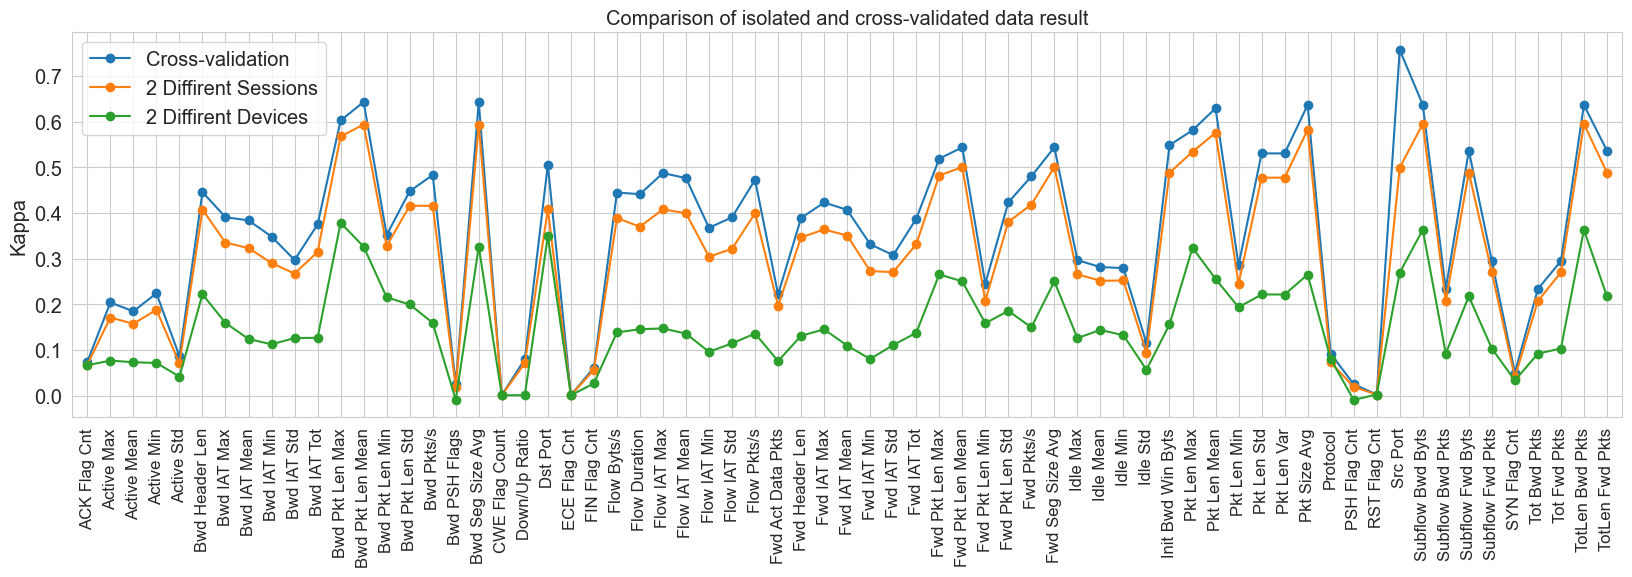

In [22]:
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
import matplotlib.pylab as pylab
sns.set_style("whitegrid")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'x-large'}
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
graph_size=80
for size in range(0,len(cleandf),graph_size):
    df = cleandf.iloc[size:size+graph_size,:]
    for i in method: 
            graph_name=f"./pdfs/Comparison_kappa(3)_{i}_{size}.pdf"
            plt.margins(x=0.01)
            my_xticks=df["Feature"]#list(iso.index)
            pylab.rcParams.update(params)
            #plt.figure(figsize=(10,10))
            #plt.plot(my_xticks,iso['Acc'], linestyle='--', marker='.', color='b',label= "Separate Train & Test acc")
            #plt.plot(my_xticks,cv['Acc'], linestyle='--', marker='.', color='r',label= "10-Fold CV acc")
            plt.plot(my_xticks,df[i], linestyle='-', marker='o',label= method[i])
    plt.title(f"Comparison of isolated and cross-validated data result")
    plt.legend(numpoints=1)
    #plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.ylabel("Kappa")
    plt.xticks(rotation=90) 
    #plt.ylim([0.69, 0.71]) 
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()
        
    

In [23]:
cleandf=[list(totaldf.columns)]
limit=0.05
for i in totaldf.values:
    if (math.isnan(i[1]) and math.isnan(i[2]) and math.isnan(i[3]) ) or (i[1]<limit and i[2]<limit  and i[3]<limit   ):
        print(i)
    else:
        cleandf.append(list(i))
cleandf = pd.DataFrame (cleandf[1:], columns = cleandf[0])   
print(len(cleandf))
cleandf

['Bwd Blk Rate Avg' 0.0 0.0 0.0]
['Bwd Byts/b Avg' 0.0 0.0 0.0]
['Bwd Pkts/b Avg' 0.0 0.0 0.0]
['Bwd PSH Flags' 0.025213879114812175 0.01938194595096375
 -0.009077199679248986]
['Bwd URG Flags' 0.0 0.0 0.0]
['CWE Flag Count' 0.001190565001292925 0.0010870047858889502
 0.00108700478588895]
['ECE Flag Cnt' 0.001188341171988525 0.00108667153213915
 0.00108667153213915]
['Fwd Blk Rate Avg' 0.0 0.0 0.0]
['Fwd Byts/b Avg' 0.0 0.0 0.0]
['Fwd Pkts/b Avg' 0.0 0.0 0.0]
['Fwd PSH Flags' 0.0 0.0 0.0]
['Fwd Seg Size Min' 0.0 0.0 0.0]
['Fwd URG Flags' 0.0 0.0 0.0]
['Init Fwd Win Byts' 0.0 0.0 0.0]
['PSH Flag Cnt' 0.025233242681789475 0.01938194595096375
 -0.009077199679248986]
['RST Flag Cnt' 0.002577255986995375 0.00250350747473445
 0.002667203692099575]
['URG Flag Cnt' 0.0 0.0 0.0]
62


,Feature,CV,SS,DD
0,ACK Flag Cnt,0.074619,0.068245,0.066898
1,Active Max,0.204069,0.171163,0.076902
2,Active Mean,0.184773,0.157484,0.073346
3,Active Min,0.224297,0.188202,0.071775
4,Active Std,0.086473,0.070647,0.041928
...,...,...,...,...
57,SYN Flag Cnt,0.050331,0.040425,0.033439
58,Tot Bwd Pkts,0.233541,0.207296,0.092259
59,Tot Fwd Pkts,0.294666,0.270007,0.103359
60,TotLen Bwd Pkts,0.636274,0.594827,0.363206


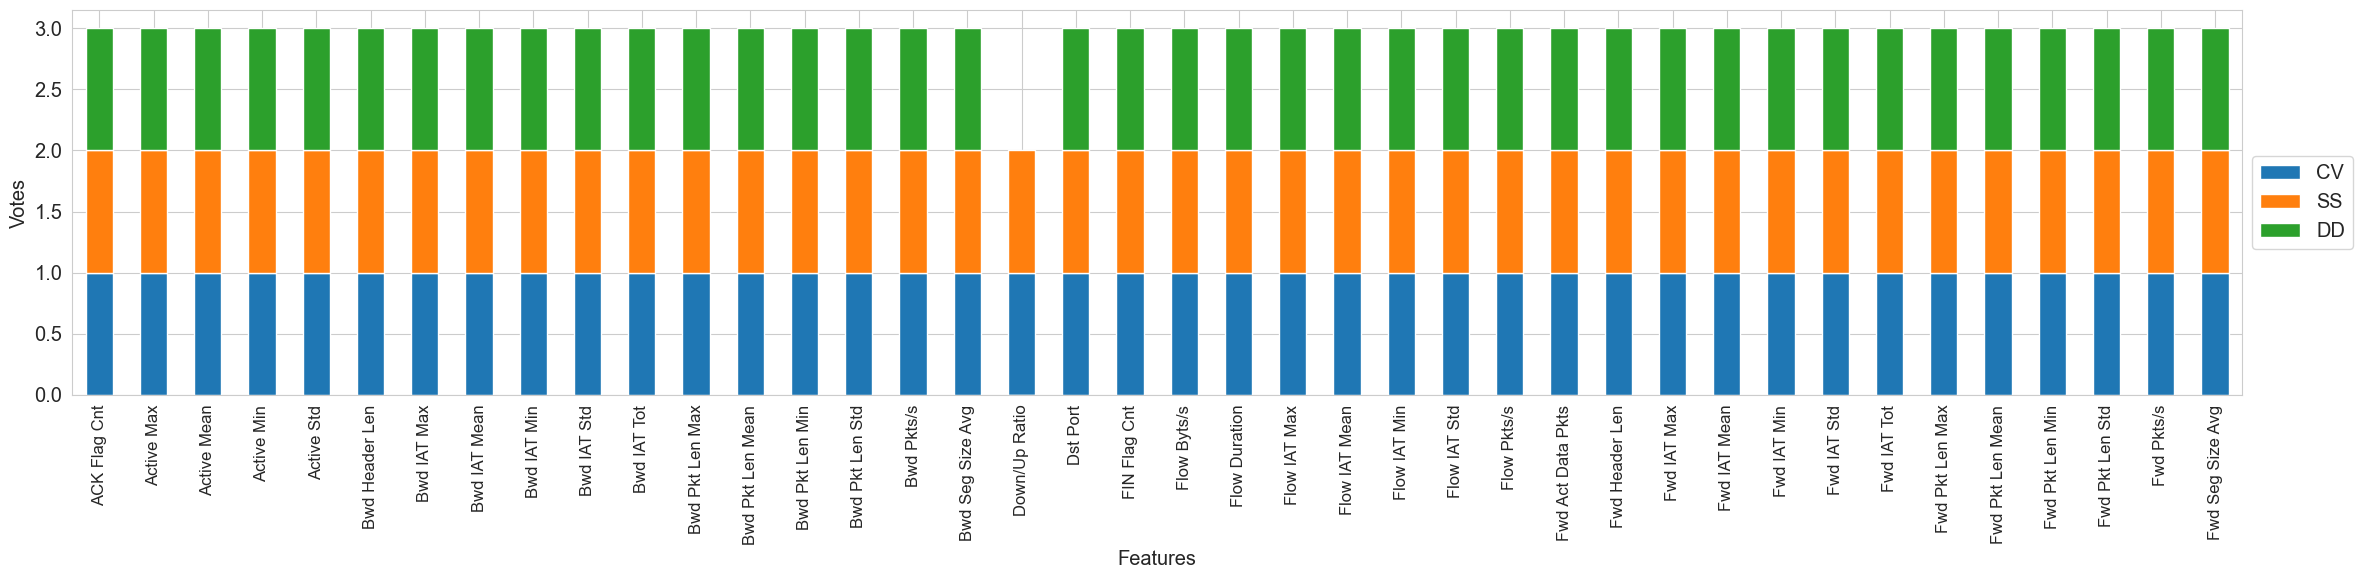

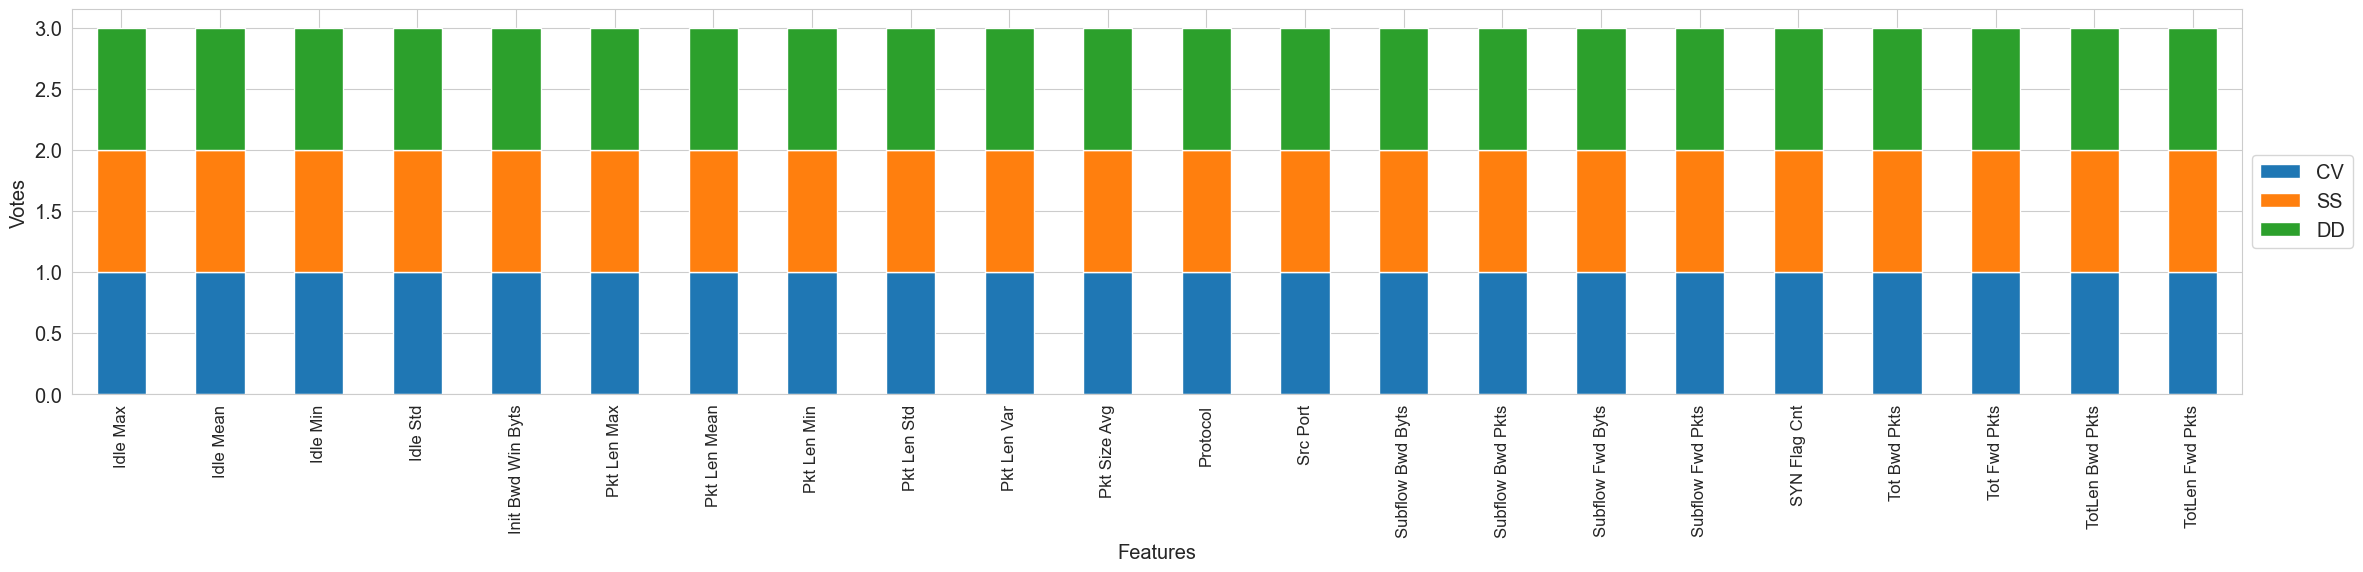

In [24]:
limit=0.019
for c in cleandf.columns[1:]:
    cleandf[c]=cleandf[c]>=limit
    cleandf[c]=cleandf[c].astype(int)
cleandf=cleandf.set_index("Feature")
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
graph_size=40
for size in range(0,len(cleandf),graph_size):
    graph_name=f"./pdfs/kappa_Voting3_{size}.PDF"
    df = cleandf.iloc[size:size+graph_size,:]
    df.plot.bar(stacked=True,figsize=(28,5))#,color=list(colors.values()))
    plt.xlabel('Features')
    plt.ylabel('Votes')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()

# 12 vote

# 12 Vote System

In [25]:
files_add=find_the_way("./results/mean",".csv")
files_add

['./results/mean\\CV\\ADS1.csv',
 './results/mean\\CV\\ADS2.csv',
 './results/mean\\CV\\DIS1.csv',
 './results/mean\\CV\\DIS2.csv',
 './results/mean\\DD\\DD11.csv',
 './results/mean\\DD\\DD11T.csv',
 './results/mean\\DD\\DD12.csv',
 './results/mean\\DD\\DD12T.csv',
 './results/mean\\DD\\DD21.csv',
 './results/mean\\DD\\DD21T.csv',
 './results/mean\\DD\\DD22.csv',
 './results/mean\\DD\\DD22T.csv',
 './results/mean\\SS\\AD-S1-2.csv',
 './results/mean\\SS\\AD-S2-1.csv',
 './results/mean\\SS\\DI-S1-2.csv',
 './results/mean\\SS\\DI-S2-1.csv']

In [26]:
files_add=['./results/mean\\CV\\ADS1.csv',
 './results/mean\\CV\\ADS2.csv',
 './results/mean\\CV\\DIS1.csv',
 './results/mean\\CV\\DIS2.csv', './results/mean\\SS\\AD-S1-2.csv',
 './results/mean\\SS\\AD-S2-1.csv',
 './results/mean\\SS\\DI-S1-2.csv',
 './results/mean\\SS\\DI-S2-1.csv',
 './results/mean\\DD\\DD11.csv',
 './results/mean\\DD\\DD11T.csv',
 './results/mean\\DD\\DD12.csv',
 './results/mean\\DD\\DD12T.csv',
 './results/mean\\DD\\DD21.csv',
 './results/mean\\DD\\DD21T.csv',
 './results/mean\\DD\\DD22.csv',
 './results/mean\\DD\\DD22T.csv']

In [27]:
flag=1
df12vote=pd.DataFrame()
for i in files_add:
    name=i.replace("\\","/")
    name=name.replace("/","-")
    name=name[15:-4]
    df=pd.read_csv(i,usecols=["Feature","kap"])
    if flag:
        df12vote["Feature"]=df["Feature"]
        flag=0
    del df["Feature"]
    df12vote[name]=df["kap"]
df12vote


,Feature,CV-ADS1,CV-ADS2,CV-DIS1,CV-DIS2,SS-AD-S1-2,SS-AD-S2-1,SS-DI-S1-2,SS-DI-S2-1,DD-DD11,DD-DD11T,DD-DD12,DD-DD12T,DD-DD21,DD-DD21T,DD-DD22,DD-DD22T
0,ACK Flag Cnt,0.083411,0.038334,0.094230,0.082501,0.063920,0.032337,0.082498,0.094228,0.094228,0.083404,0.082498,0.083404,0.029973,0.063920,0.033839,0.063920
1,Active Max,0.199457,0.252818,0.216291,0.147709,0.223098,0.172608,0.122947,0.166001,0.089589,0.075626,0.057556,0.064260,0.083659,0.097288,0.050153,0.097083
2,Active Mean,0.176641,0.226231,0.199705,0.136516,0.202498,0.160695,0.114120,0.152623,0.085350,0.066797,0.051344,0.062158,0.084106,0.094628,0.049093,0.093289
3,Active Min,0.220675,0.271746,0.237936,0.166831,0.245440,0.194014,0.127629,0.185726,0.085430,0.058662,0.056886,0.051375,0.093886,0.088507,0.052139,0.087313
4,Active Std,0.080094,0.101147,0.099748,0.064905,0.066214,0.071930,0.058443,0.086001,0.027070,0.041191,0.027882,0.039749,0.055426,0.054135,0.034371,0.055598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Tot Bwd Pkts,0.224669,0.287424,0.231097,0.190973,0.258582,0.211128,0.171577,0.187895,0.074664,0.094241,0.061521,0.090159,0.088560,0.136888,0.068992,0.123045
75,Tot Fwd Pkts,0.264703,0.350457,0.308825,0.254680,0.313254,0.247440,0.233953,0.285382,0.094935,0.120927,0.073972,0.097750,0.104069,0.144119,0.080272,0.110827
76,TotLen Bwd Pkts,0.651905,0.705826,0.620085,0.567283,0.649064,0.599744,0.529970,0.600530,0.390580,0.371265,0.331024,0.356191,0.373770,0.388740,0.322359,0.371720
77,TotLen Fwd Pkts,0.548011,0.592038,0.530237,0.474316,0.547826,0.463236,0.437723,0.504888,0.204604,0.227009,0.186060,0.224865,0.223755,0.267692,0.180846,0.225224


In [31]:
df12vote.to_csv("ortalama.csv")

In [32]:
cols=list(df12vote.columns)[1:]
cleandf=[list(df12vote.columns)]
limit=0.049
for i in df12vote.values:
    flag=1
    if all(p != p for p in i[1:]):
        flag=0
    if all(v <= limit for v in i[1:]):
        flag=0

    if flag:
        cleandf.append(list(i))
cleandf = pd.DataFrame (cleandf[1:], columns = cleandf[0])   
print(len(cleandf))
cleandf

62


,Feature,CV-ADS1,CV-ADS2,CV-DIS1,CV-DIS2,SS-AD-S1-2,SS-AD-S2-1,SS-DI-S1-2,SS-DI-S2-1,DD-DD11,DD-DD11T,DD-DD12,DD-DD12T,DD-DD21,DD-DD21T,DD-DD22,DD-DD22T
0,ACK Flag Cnt,0.083411,0.038334,0.094230,0.082501,0.063920,0.032337,0.082498,0.094228,0.094228,0.083404,0.082498,0.083404,0.029973,0.063920,0.033839,0.063920
1,Active Max,0.199457,0.252818,0.216291,0.147709,0.223098,0.172608,0.122947,0.166001,0.089589,0.075626,0.057556,0.064260,0.083659,0.097288,0.050153,0.097083
2,Active Mean,0.176641,0.226231,0.199705,0.136516,0.202498,0.160695,0.114120,0.152623,0.085350,0.066797,0.051344,0.062158,0.084106,0.094628,0.049093,0.093289
3,Active Min,0.220675,0.271746,0.237936,0.166831,0.245440,0.194014,0.127629,0.185726,0.085430,0.058662,0.056886,0.051375,0.093886,0.088507,0.052139,0.087313
4,Active Std,0.080094,0.101147,0.099748,0.064905,0.066214,0.071930,0.058443,0.086001,0.027070,0.041191,0.027882,0.039749,0.055426,0.054135,0.034371,0.055598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,SYN Flag Cnt,0.045262,0.051683,0.046563,0.057815,0.052045,0.038308,0.042023,0.029324,0.025489,0.038308,0.023295,0.035723,0.046706,0.051685,0.042023,0.004285
58,Tot Bwd Pkts,0.224669,0.287424,0.231097,0.190973,0.258582,0.211128,0.171577,0.187895,0.074664,0.094241,0.061521,0.090159,0.088560,0.136888,0.068992,0.123045
59,Tot Fwd Pkts,0.264703,0.350457,0.308825,0.254680,0.313254,0.247440,0.233953,0.285382,0.094935,0.120927,0.073972,0.097750,0.104069,0.144119,0.080272,0.110827
60,TotLen Bwd Pkts,0.651905,0.705826,0.620085,0.567283,0.649064,0.599744,0.529970,0.600530,0.390580,0.371265,0.331024,0.356191,0.373770,0.388740,0.322359,0.371720


In [33]:
colors={'CV-CS1D1':"#0049C6", 'CV-CS1D2':"#0069C6", 'CV-CS2D1':"#0099C6", 'CV-CS2D2':"#00A9C6", 
      
        'SS-SD1':"#FF5733", 'SS-SD1T':"#DA5733", 'SS-SD2':"#BF5733",'SS-SD2T':"#CF5733",  'DD-DD1':"#00A603",'DD-DD1T':"#00C603", 'DD-DD2':"#00E603", 'DD-DD2T':"#00F603"}

colors={
'CV-ADS1':"#0049C6",
 'CV-ADS2':"#0069C6",
 'CV-DIS1':"#0099C6",
 'CV-DIS2':"#00A9C6",
 'SS-AD-S1-2':"#FF5733",
 'SS-AD-S2-1':"#DA5733",
 'SS-DI-S1-2':"#BF5733",
 'SS-DI-S2-1':"#CF5733", 
 'DD-DD11':"#00A603",
 'DD-DD11T':"#00C603",
 "DD-DD12":"#65A600",
 "DD-DD12T":"#00A64E",
 "DD-DD21":"#20BD07",
 "DD-DD21T":"#07BD68",
 'DD-DD22':"#00E603",
 'DD-DD22T':"#00F603"}


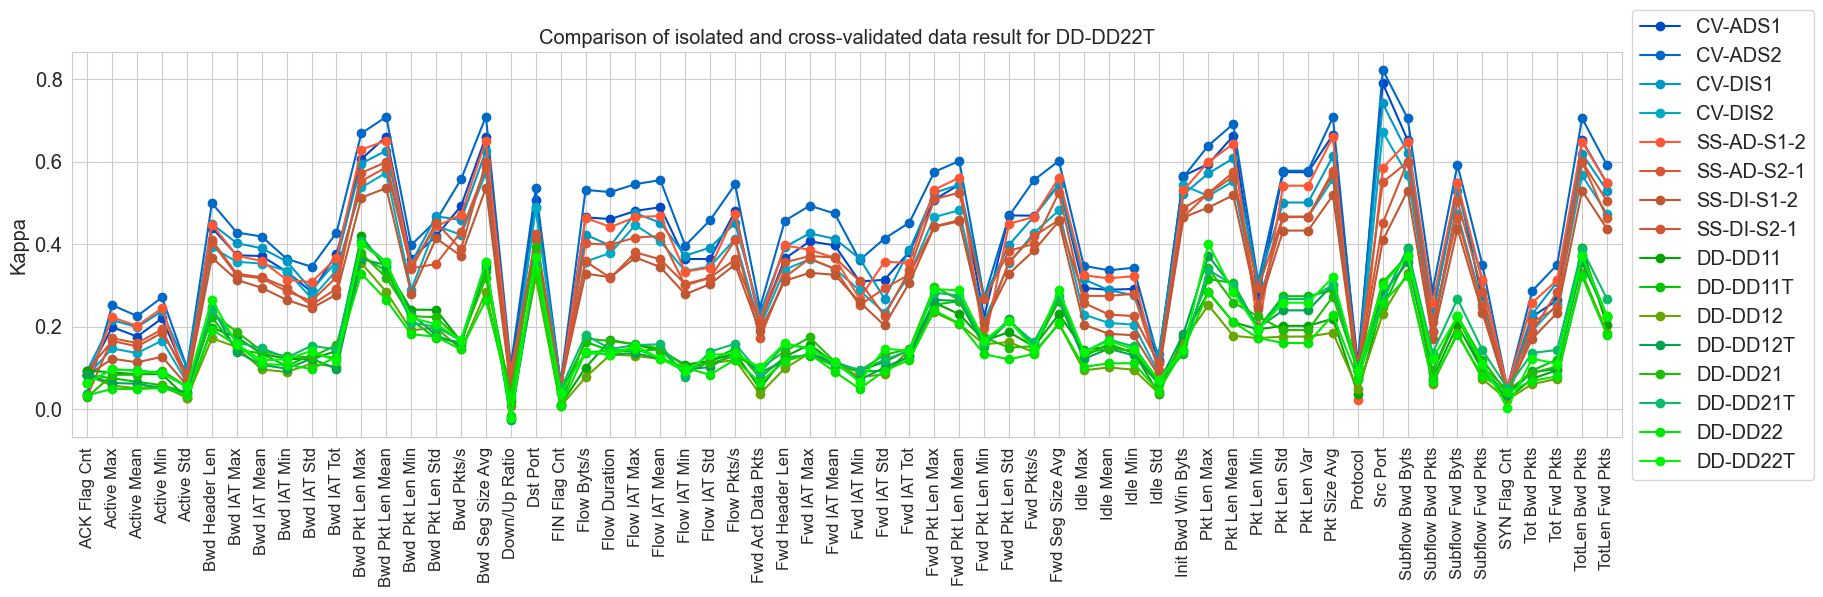

In [37]:
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
import matplotlib.pylab as pylab
sns.set_style("whitegrid")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'x-large'}
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
graph_size=80
for size in range(0,len(cleandf),graph_size):
    graph_name=f"./pdfs/kappa_line_12_{size}.PDF"
    df = cleandf.iloc[size:size+graph_size,:]
    for i in cols: 
            plt.margins(x=0.01)
            my_xticks=df["Feature"]#list(iso.index)
            pylab.rcParams.update(params)
            #plt.figure(figsize=(10,10))
            #plt.plot(my_xticks,iso['Acc'], linestyle='--', marker='.', color='b',label= "Separate Train & Test acc")
            #plt.plot(my_xticks,cv['Acc'], linestyle='--', marker='.', color='r',label= "10-Fold CV acc")
            plt.plot(my_xticks,df[i], linestyle='-', marker='o',color=colors[i],label= i)
    plt.title(f"Comparison of isolated and cross-validated data result for {i}")
    plt.legend(numpoints=1)
    #plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.ylabel("Kappa")
    plt.xticks(rotation=90) 
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.ylim([0.69, 0.71]) 
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()
    
    

In [35]:
cleandf.head(60)

,Feature,CV-ADS1,CV-ADS2,CV-DIS1,CV-DIS2,SS-AD-S1-2,SS-AD-S2-1,SS-DI-S1-2,SS-DI-S2-1,DD-DD11,DD-DD11T,DD-DD12,DD-DD12T,DD-DD21,DD-DD21T,DD-DD22,DD-DD22T
0,ACK Flag Cnt,0.083411,0.038334,0.094230,0.082501,0.063920,0.032337,0.082498,0.094228,0.094228,0.083404,0.082498,0.083404,0.029973,0.063920,0.033839,0.063920
1,Active Max,0.199457,0.252818,0.216291,0.147709,0.223098,0.172608,0.122947,0.166001,0.089589,0.075626,0.057556,0.064260,0.083659,0.097288,0.050153,0.097083
2,Active Mean,0.176641,0.226231,0.199705,0.136516,0.202498,0.160695,0.114120,0.152623,0.085350,0.066797,0.051344,0.062158,0.084106,0.094628,0.049093,0.093289
3,Active Min,0.220675,0.271746,0.237936,0.166831,0.245440,0.194014,0.127629,0.185726,0.085430,0.058662,0.056886,0.051375,0.093886,0.088507,0.052139,0.087313
4,Active Std,0.080094,0.101147,0.099748,0.064905,0.066214,0.071930,0.058443,0.086001,0.027070,0.041191,0.027882,0.039749,0.055426,0.054135,0.034371,0.055598
5,Bwd Header Len,0.440244,0.499982,0.449453,0.392673,0.447887,0.404670,0.367548,0.409831,0.198067,0.223363,0.172540,0.247433,0.233519,0.242811,0.192500,0.266300
6,Bwd IAT Max,0.373666,0.428691,0.402952,0.357668,0.372581,0.325010,0.313997,0.328764,0.174934,0.144504,0.150924,0.139499,0.187941,0.162343,0.156867,0.157755
7,Bwd IAT Mean,0.371627,0.419020,0.390409,0.353604,0.359687,0.317759,0.294762,0.320547,0.135019,0.135919,0.096846,0.107957,0.141409,0.148150,0.109961,0.118897
8,Bwd IAT Min,0.333984,0.365036,0.358752,0.335685,0.314443,0.286126,0.265494,0.295095,0.122619,0.104482,0.090740,0.098839,0.128352,0.125441,0.107773,0.121743
9,Bwd IAT Std,0.284738,0.345664,0.289032,0.269131,0.308291,0.262944,0.245217,0.253082,0.121622,0.133516,0.110826,0.122981,0.126834,0.154395,0.098217,0.141734


# Voting

In [36]:
#cleandf=df12vote

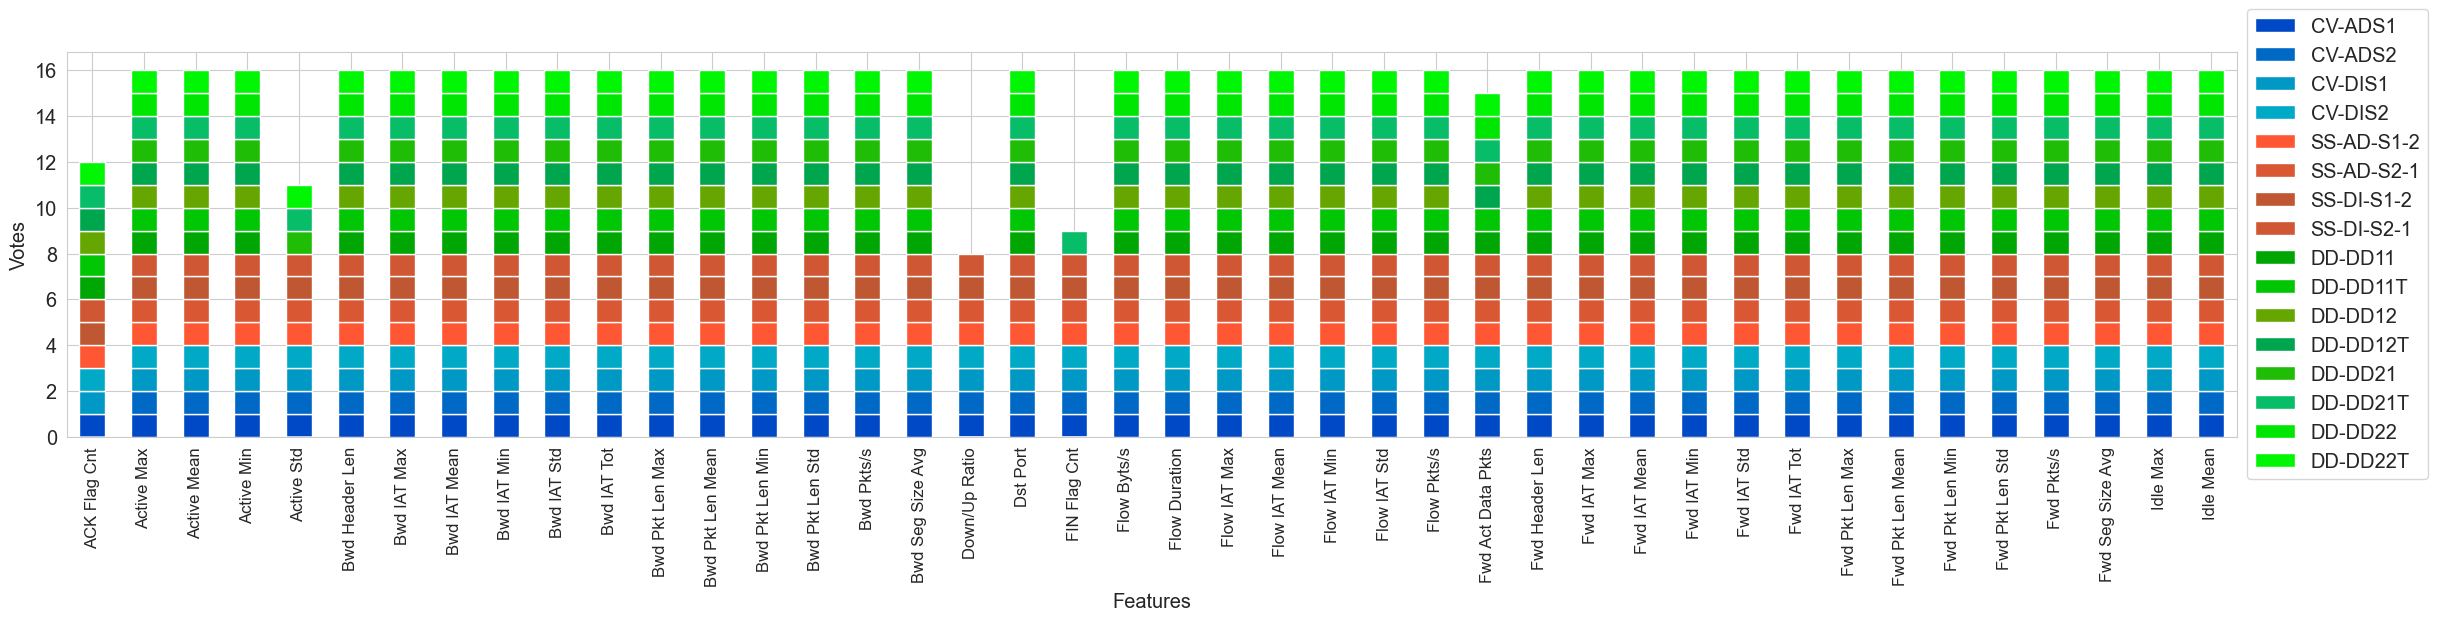

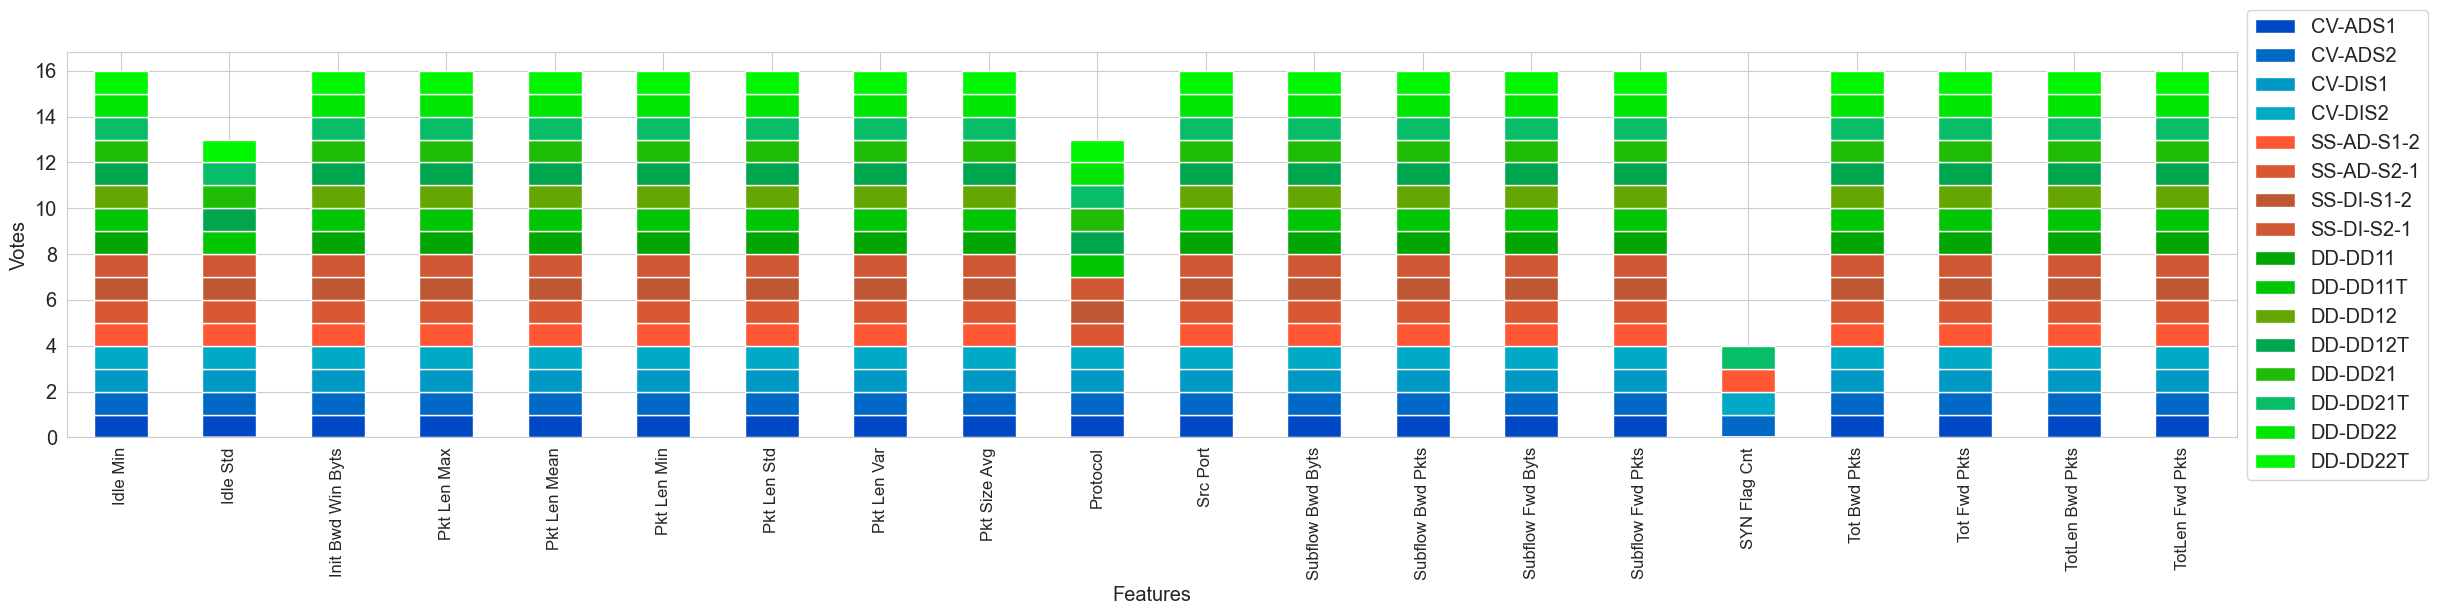

In [38]:
limit=0.049
for c in cleandf.columns[1:]:
    cleandf[c]=cleandf[c]>=limit
    cleandf[c]=cleandf[c].astype(int)
cleandf=cleandf.set_index("Feature")

graph_size=42
for size in range(0,len(cleandf),graph_size):
    graph_name=f"./pdfs/kappa_Voting12_{size}.PDF"
    df = cleandf.iloc[size:size+graph_size,:]
    df.plot.bar(stacked=True,figsize=(28,5),color=list(colors.values()))
    plt.xlabel('Features')
    plt.ylabel('Votes')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()

In [39]:
evalauated_features=[]
GA_input_features=[]
for ii,i in enumerate(cleandf.values):

    temp=sum(i[-8:])
    if temp:
        temp=sum(i[-12:])
        if temp>=4:
            evalauated_features.append(1)
        else:
            evalauated_features.append(0)
    else:
        evalauated_features.append(0)
    print(cleandf.index[ii],i,evalauated_features[ii])
    if evalauated_features[ii]:
        GA_input_features.append(cleandf.index[ii])
        

ACK Flag Cnt [1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1] 1
Active Max [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Active Mean [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Active Min [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Active Std [1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1] 1
Bwd Header Len [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd IAT Max [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd IAT Mean [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd IAT Min [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd IAT Std [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd IAT Tot [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd Pkt Len Max [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd Pkt Len Mean [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd Pkt Len Min [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd Pkt Len Std [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd Pkts/s [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Bwd Seg Size Avg [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
Down/Up Ratio [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0] 0
Dst Port [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 1
FIN Flag Cnt [1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0] 1
Flow Byts/s [1 1 

In [40]:
(GA_input_features)

['ACK Flag Cnt',
 'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Bwd Header Len',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Tot',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Std',
 'Bwd Pkts/s',
 'Bwd Seg Size Avg',
 'Dst Port',
 'FIN Flag Cnt',
 'Flow Byts/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow Pkts/s',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Tot',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Std',
 'Fwd Pkts/s',
 'Fwd Seg Size Avg',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Init Bwd Win Byts',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Min',
 'Pkt Len Std',
 'Pkt Len Var',
 'Pkt Size Avg',
 'Protocol',
 'Src Port',
 'Subflow Bwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Fwd Pkts',
 'Tot Bwd Pkts',
 'Tot Fwd Pkts',


In [41]:
len(GA_input_features)

60

In [42]:
import pickle


with open('GA_input_features.pickle', 'wb') as handle:
    pickle.dump(GA_input_features, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('GA_input_features.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(GA_input_features == b)

True
